Conociendo nuestros datos de pingüinos. 🗺🧭🐧

Instalar librerías necesarias
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

Importar librerías

In [18]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

Establecer apariencia general de los gráficos

In [1]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}
pd.set_option('display.max_columns', None)  # Muestra todas las columnas sin truncar
pd.set_option('display.expand_frame_repr', False)  # Evita el salto de línea en tablas anchas
pd.set_option('display.max_colwidth', None)  # Evita que el contenido de las celdas se trunque
pd.set_option('display.width', 0)  # Ajusta el ancho a la ventana del terminal

NameError: name 'sns' is not defined

Cargar los datos



Utilizando el paquete palmerpenguins


Datos crudos

In [20]:
palmerpenguins.load_penguins_raw()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


In [21]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


Utilizando los conjuntos de datos de seaborn

In [22]:
preprocessed_penguins_df = sns.load_dataset("penguins")
preprocessed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Utilizando la interfaz de Deepnote


In [23]:
raw_penguins_df2 = pd.read_csv('data/penguins_raw.csv')
raw_penguins_df2

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


In [24]:
preprocessed_penguins_df2 = pd.read_csv('data/penguins.csv')
preprocessed_penguins_df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Colecta y validación de datos

¿Qué tipo de dato son las variables del conjunto de datos?

In [25]:
preprocessed_penguins_df.dtypes


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [26]:
(
    preprocessed_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
dtype: int64

¿Cuántas variables y observaciones tenemos en el conjunto de datos?


In [27]:
preprocessed_penguins_df.shape


(344, 7)

¿Existen valores nulos explicitos en el conjunto de datos?


In [28]:
(
    preprocessed_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?


In [29]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

¿Cuántos valores nulos tenemos en total en el conjunto de datos?


In [30]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

¿Cuál es la proporción de valores nulos por cada variable?


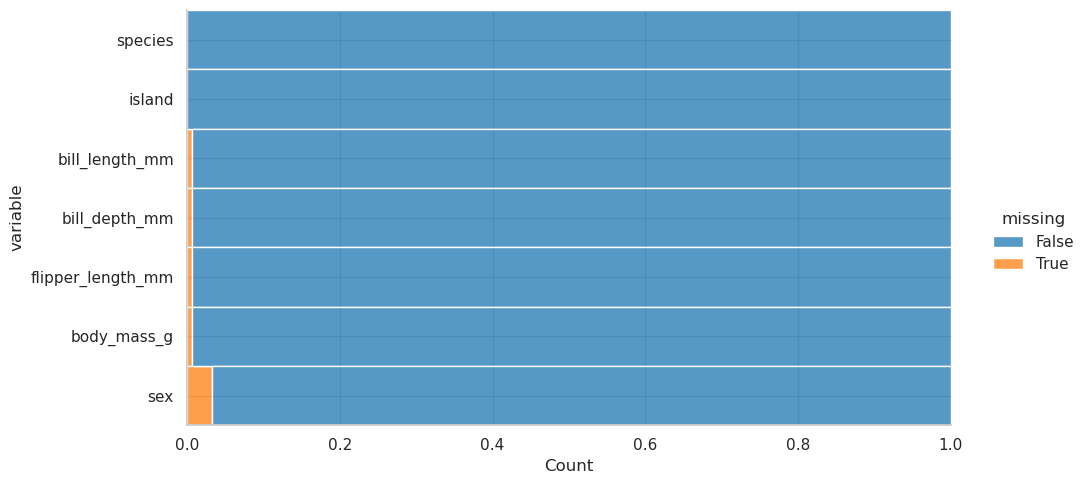

In [31]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?


<Axes: >

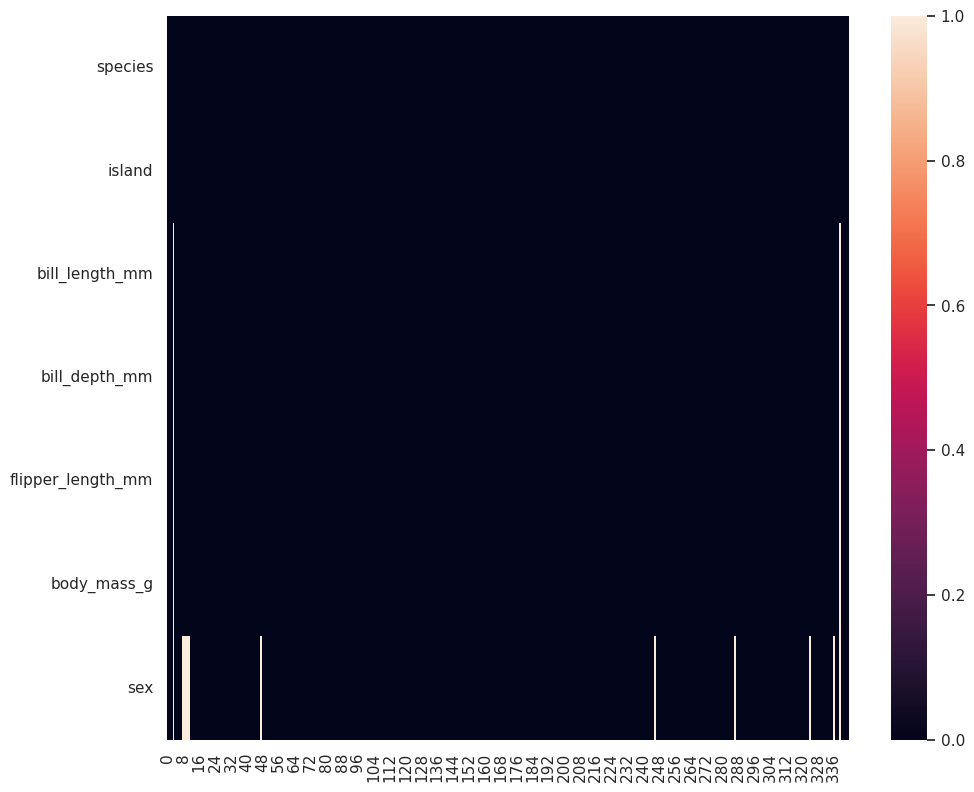

In [32]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

¿Cuántas observaciones perdemos si eliminamos los datos faltantes?


In [ ]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Conteos y proporciones

Preludio: ¿Qué estadísticos describen el conjunto de datos?

Todas las variables

In [34]:
processed_penguins_df.describe(include='all')
#processed_penguins_df.describe()





,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


Solo las numéricas


In [35]:
processed_penguins_df.describe(include=[np.number])


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Solo categóricas - 1


In [36]:
processed_penguins_df.describe(include=object)


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


Solo categóricas - 2


In [37]:
(
    processed_penguins_df
    .astype(
        {
            'species': 'category',
            'island': 'category',
            'sex': 'category'
        }
    )
    .describe(include=['category', object])
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


¿Cómo visualizar los conteos?

Pandas

<Axes: >

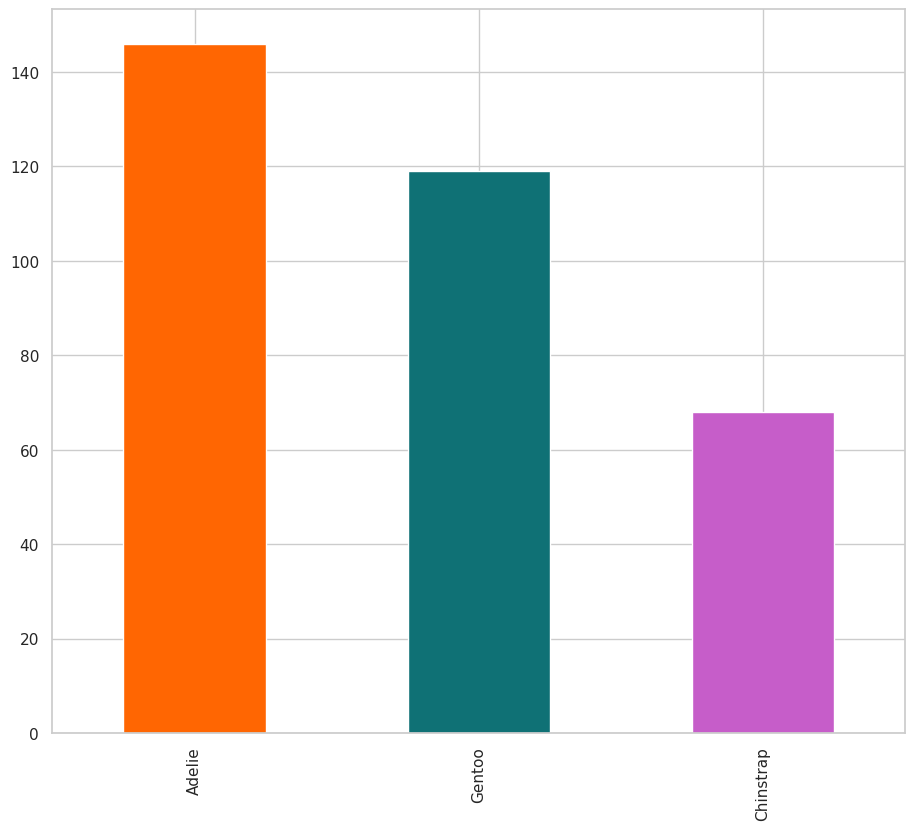

In [38]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar',
        color=penguin_color.values()
    )
)

<Axes: >

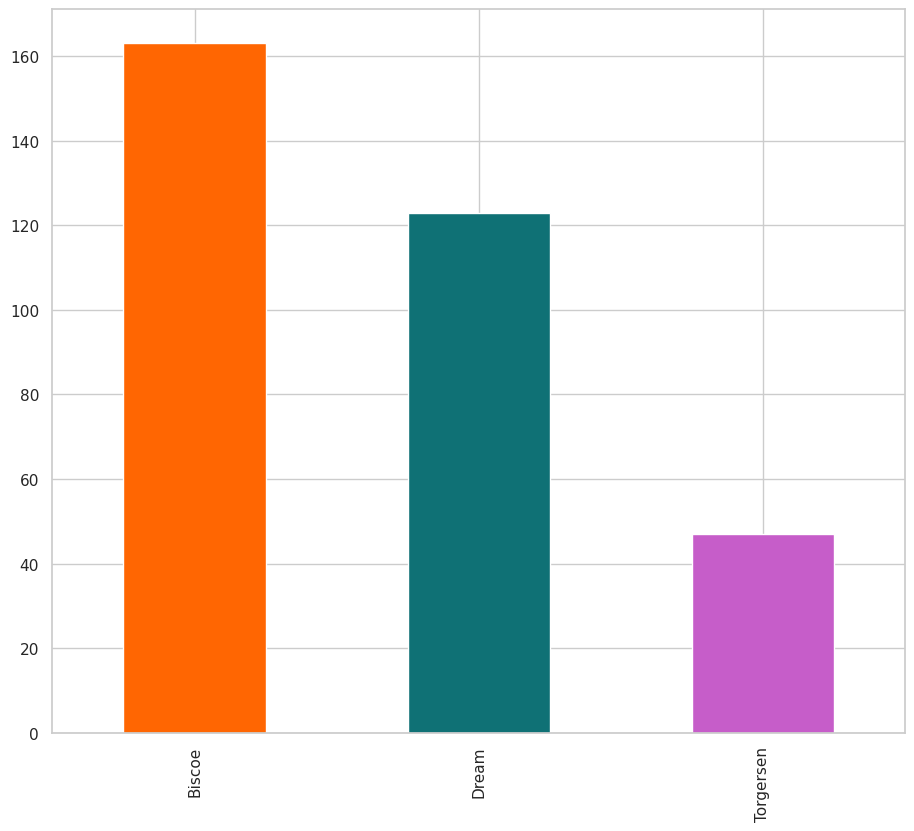

In [39]:
(
    processed_penguins_df
    .island
    .value_counts()
    .plot(
        kind='bar',
        color=penguin_color.values()
    )
)

Seaborn

<Axes: >

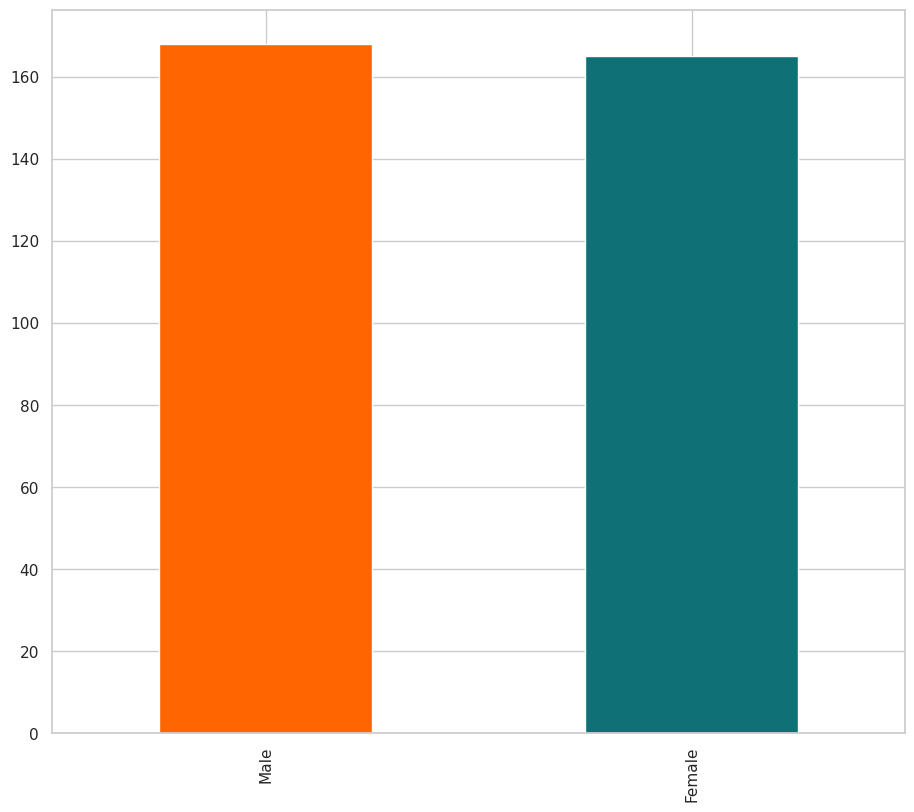

In [40]:
(
    processed_penguins_df
    .sex
    .value_counts()
    .plot(
        kind='bar',
        color=penguin_color.values()
    )
)

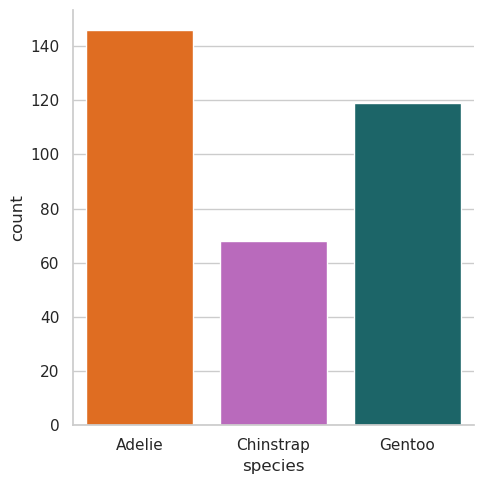

In [41]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color,
    # order=processed_penguins_df.value_counts('species', sort=True).index
)



<Axes: xlabel='species', ylabel='count'>

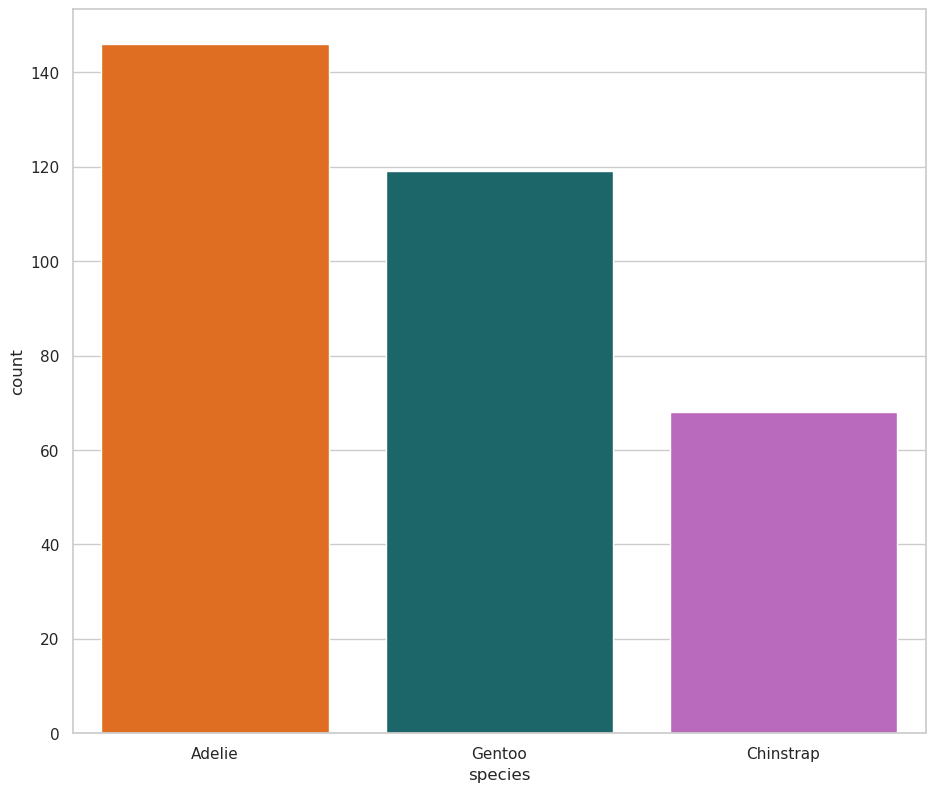

In [42]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
)

¿Cómo visualizar las proporciones?

/home/grlg/miniconda3/envs/DE/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)


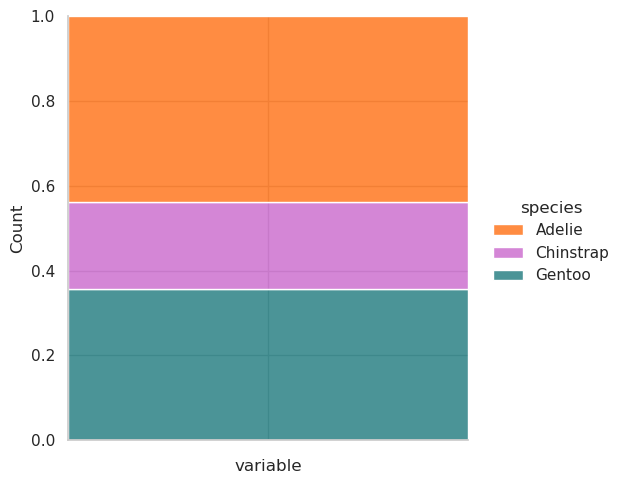

In [43]:
(
    processed_penguins_df
    .add_column('variable', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

Medidas de tendencia central


Media o promedio


In [44]:
processed_penguins_df.bill_depth_mm.mean()
np.mean(processed_penguins_df.bill_depth_mm)
processed_penguins_df.mean()

processed_penguins_df.median()
processed_penguins_df.mode()
processed_penguins_df.describe(include=object)

/tmp/ipykernel_1147/1680988049.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()
/tmp/ipykernel_1147/1680988049.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


In [45]:
np.mean(processed_penguins_df.bill_depth_mm)


17.164864864864864

In [46]:
processed_penguins_df.mean()


/tmp/ipykernel_1147/2620306171.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

Mediana

In [47]:
processed_penguins_df.median()


/tmp/ipykernel_1147/2423368060.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

Moda

In [48]:
processed_penguins_df.mode()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male


In [49]:
processed_penguins_df.describe(include=object)


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


Medidas de dispersión


¿Cuál es el valor máximo de las variables?


In [50]:
processed_penguins_df.max()


species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       Male
dtype: object

¿Cuál es el valor mínimo de las variables?


In [51]:
processed_penguins_df.min()


species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                  Female
dtype: object

¿Cuál es el rango de las variables?


In [52]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)


bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

¿Cuál es la desviación estándar de las variables?


In [53]:
processed_penguins_df.std()


/tmp/ipykernel_1147/1652622896.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

¿Cuál es el rango intercuartílico?

In [54]:
processed_penguins_df.quantile(0.25)


/tmp/ipykernel_1147/1461951857.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [55]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)


/tmp/ipykernel_1147/771109162.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [56]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

/tmp/ipykernel_1147/610954116.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


,metric,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0


¿Cómo puedo visualizar la distribución de una variable?


Histograma

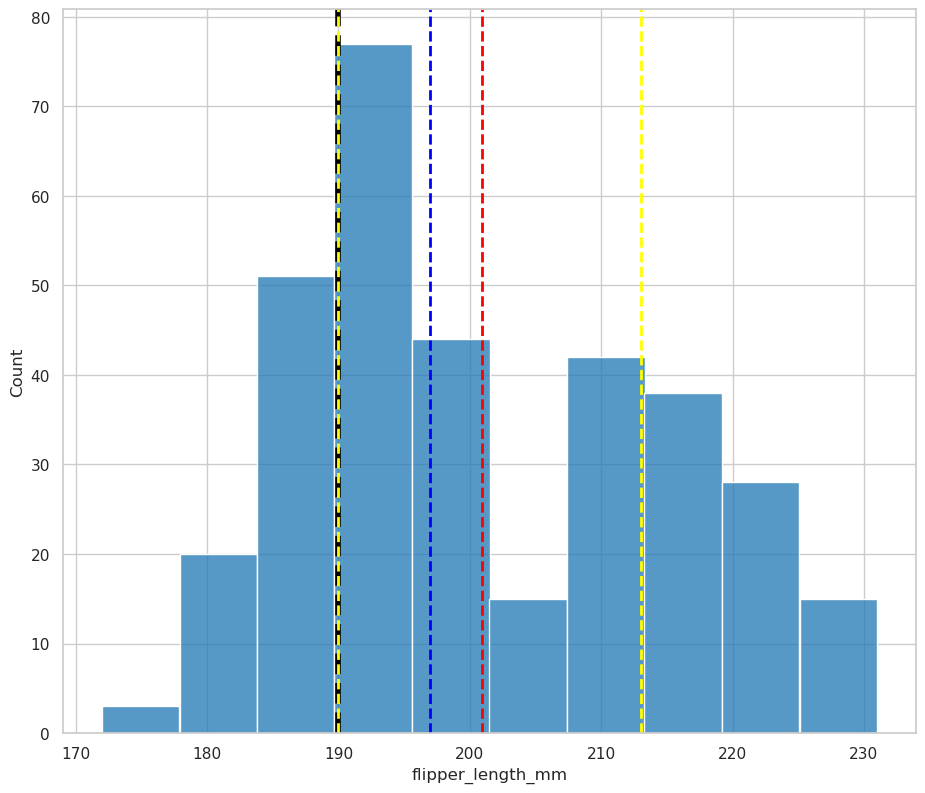

In [57]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm'>

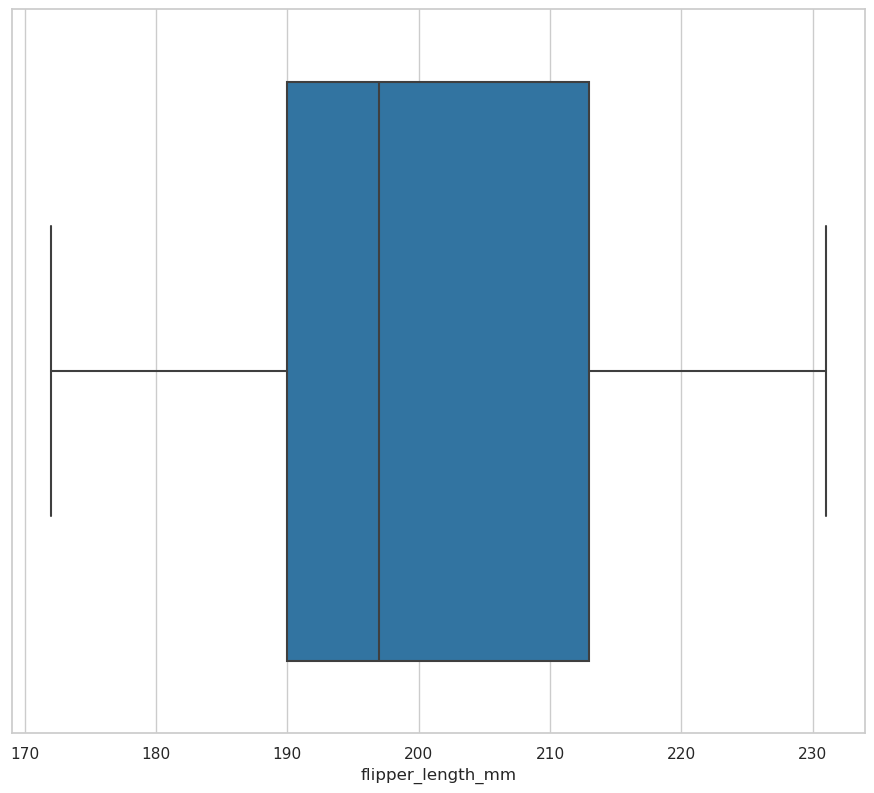

In [58]:
sns.boxplot(
    x=processed_penguins_df.flipper_length_mm,
)

Limitaciones

In [59]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

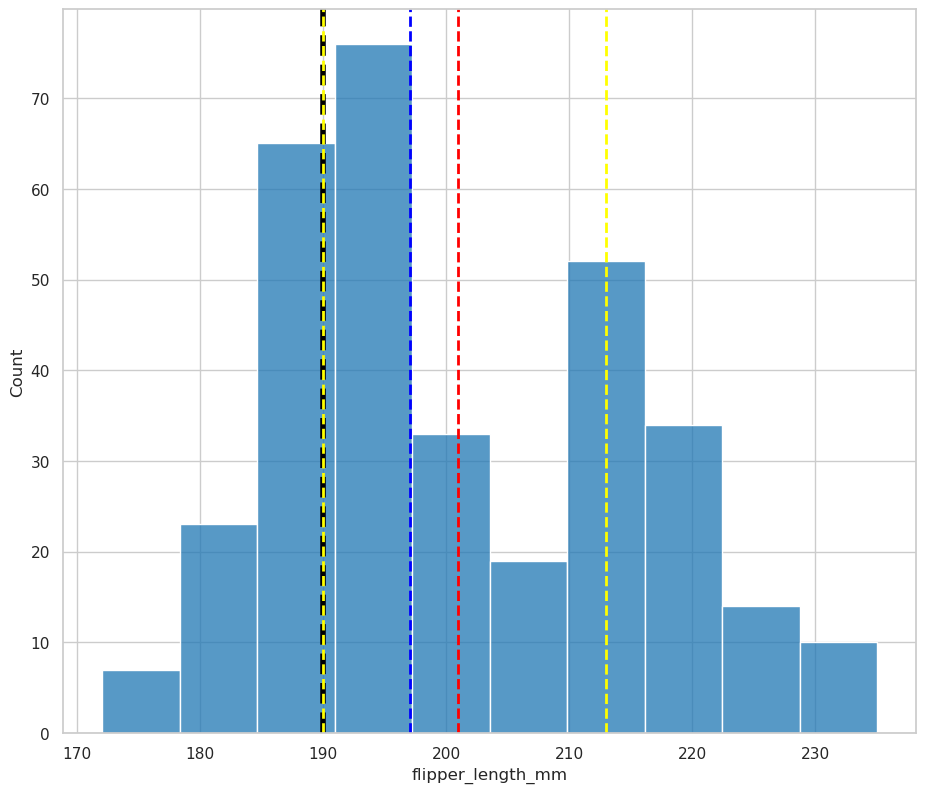

In [60]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=6.3
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

Distribuciones: PMFs, CDFs y PDFs


Funciones de probabilidad de masas (PMFs)


Utilizando seaborn


<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

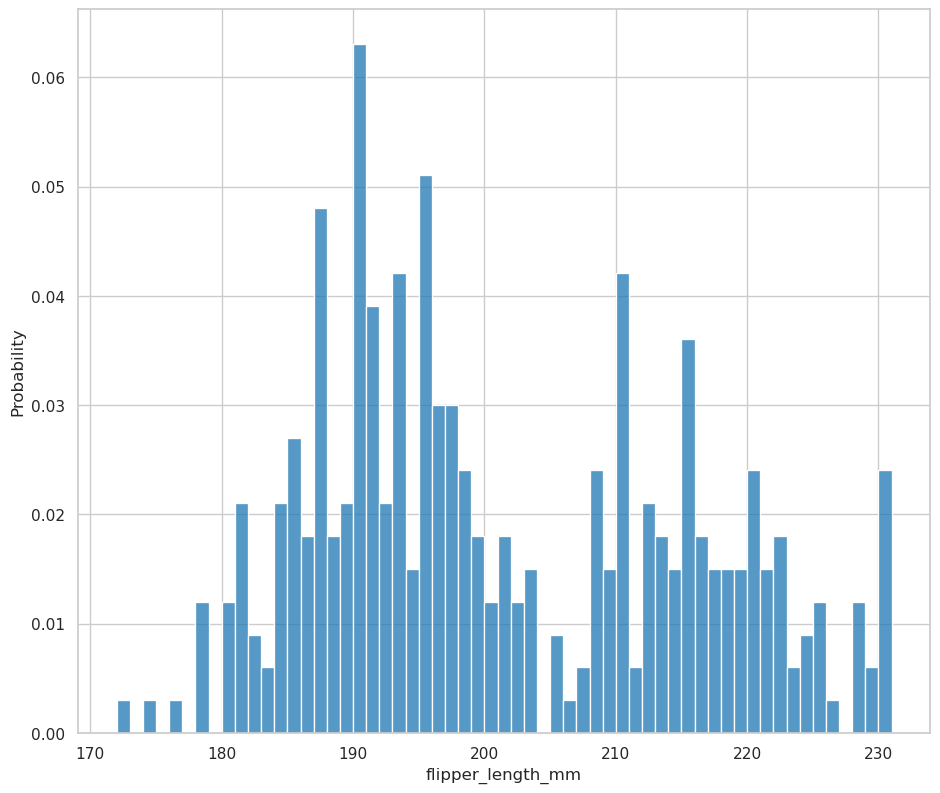

In [61]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

Utilizando empiricaldist


In [62]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

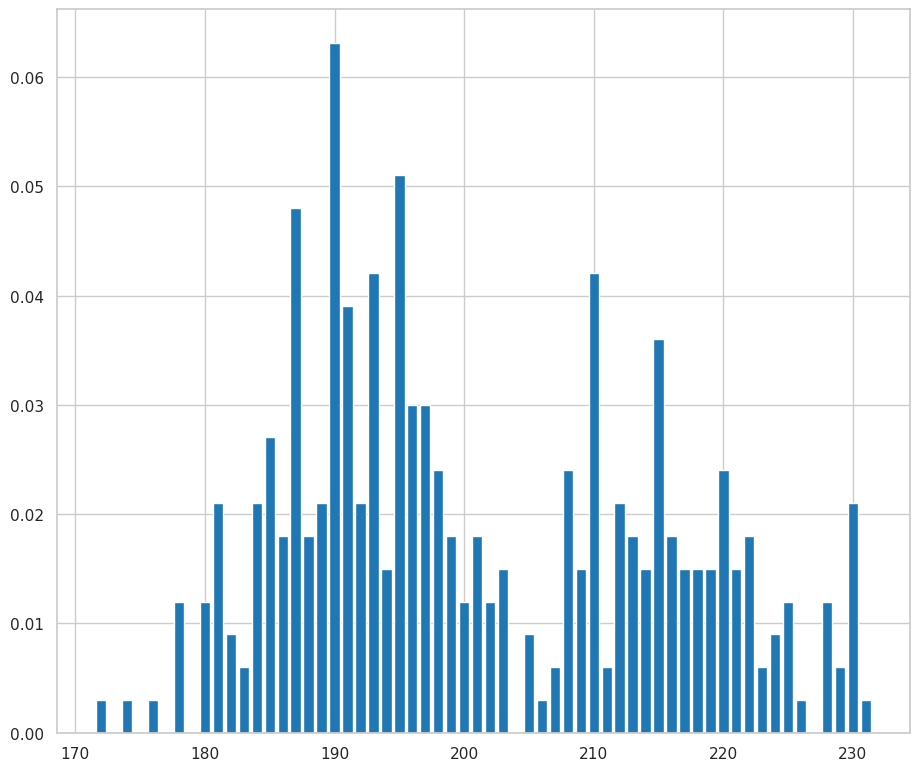

In [63]:
pmf_flipper_length_mm.bar()


In [64]:
pmf_flipper_length_mm(231)


0.003003003003003003

In [65]:
processed_penguins_df.flipper_length_mm.max()


231.0

Funciones empirícas de probabilidad acumulada (ECDFs)


Utilizando seaborn


<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

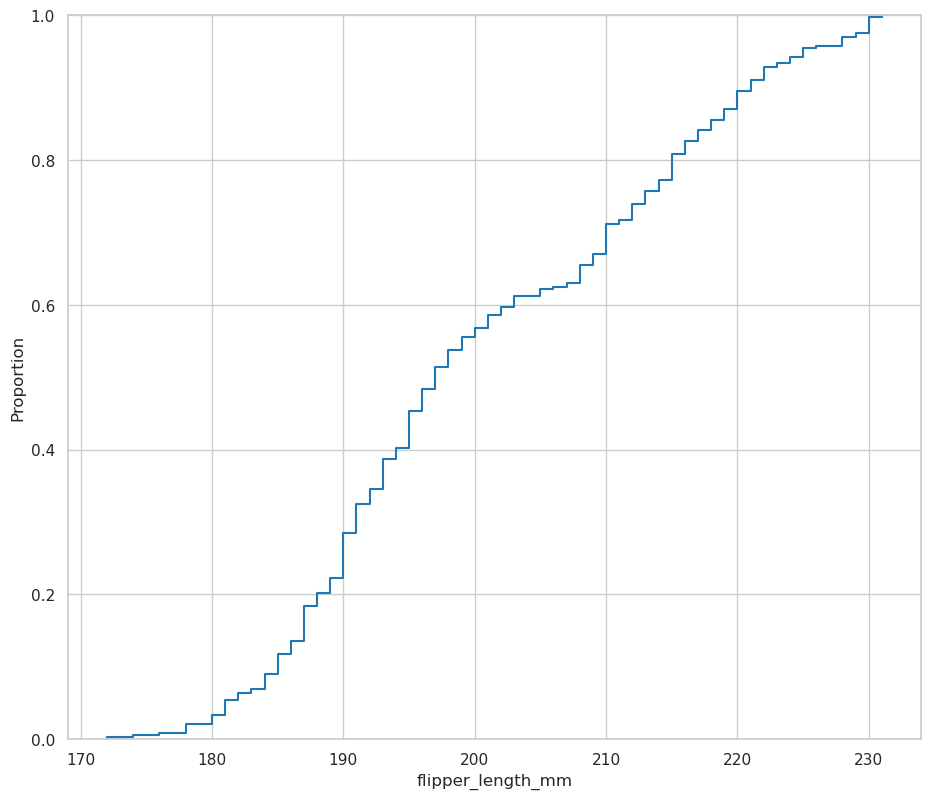

In [66]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)

Utilizando empiricaldist


In [67]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

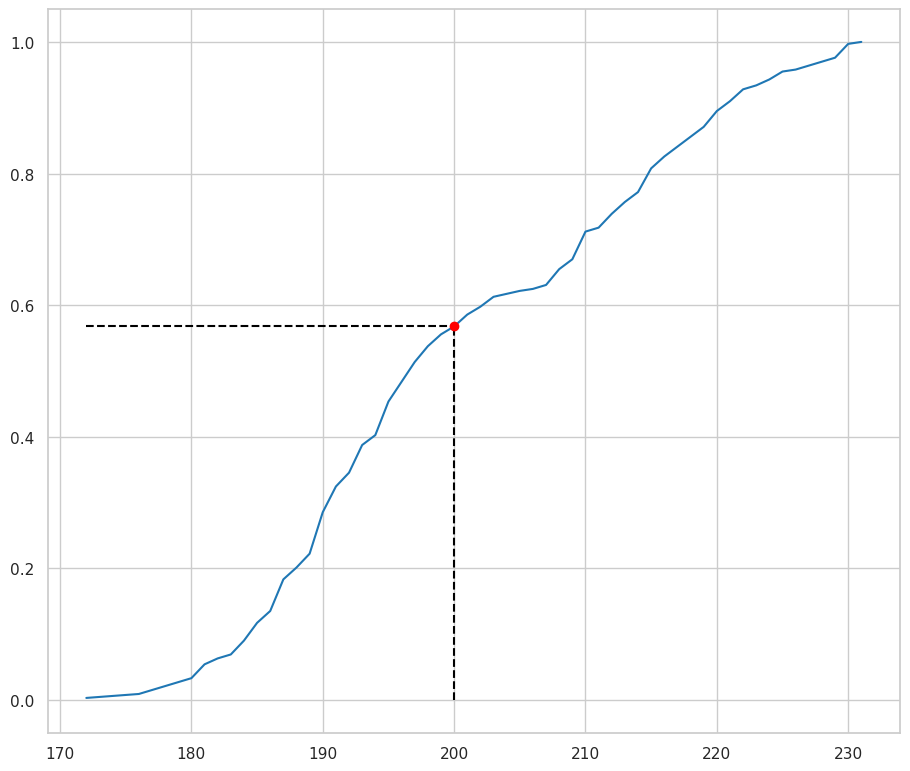

In [68]:
cdf_flipper_length_mm.plot()

q = 200 # Specify quantity
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')


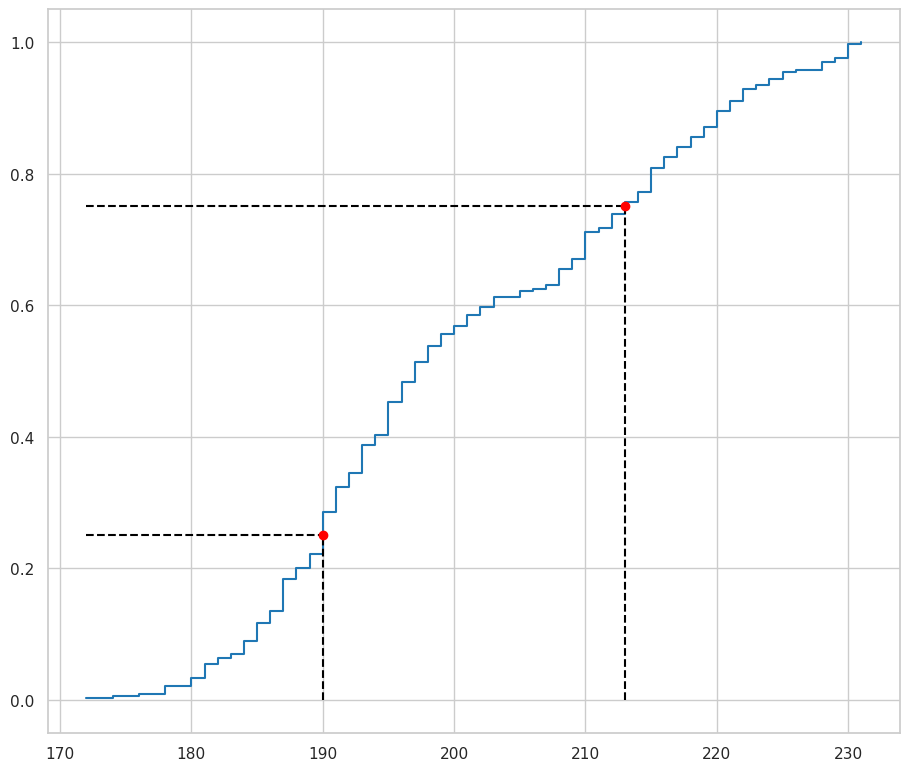

In [69]:
cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

Comparando distribuciones


<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

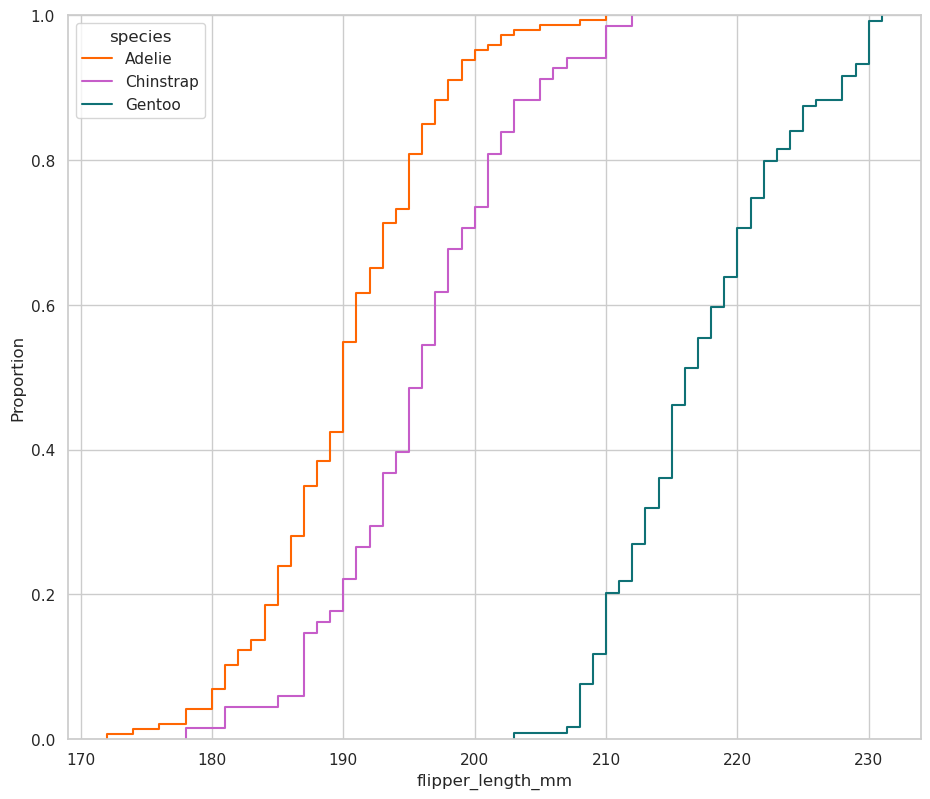

In [70]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Funciones de densidad de probabilidad


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

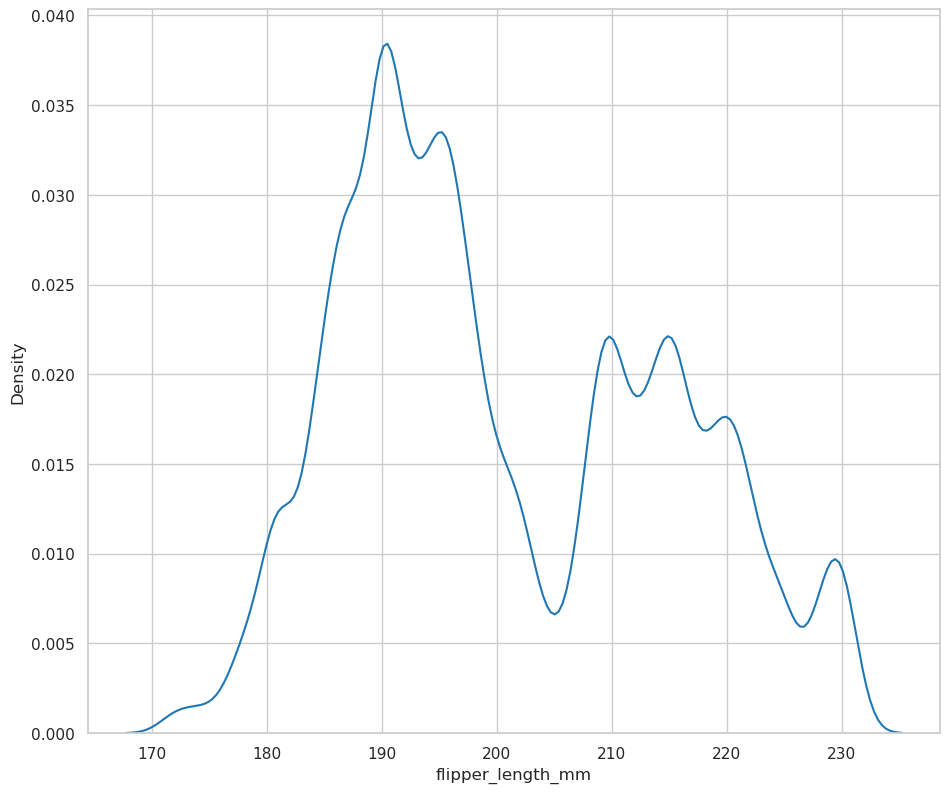

In [71]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

In [72]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: >

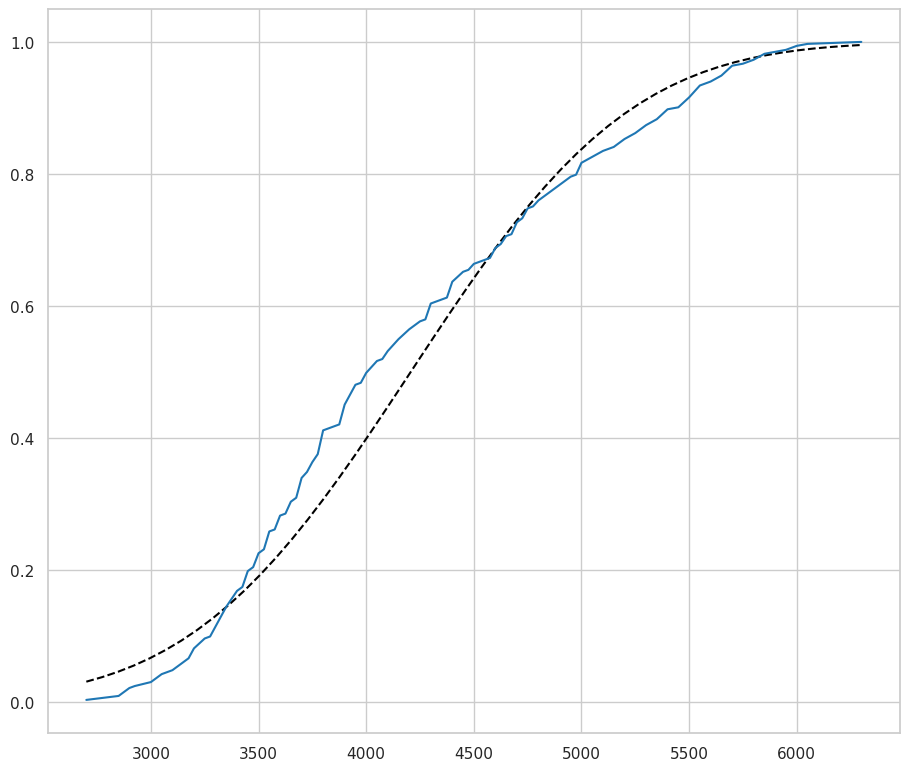

In [73]:
np.random.seed(42)
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

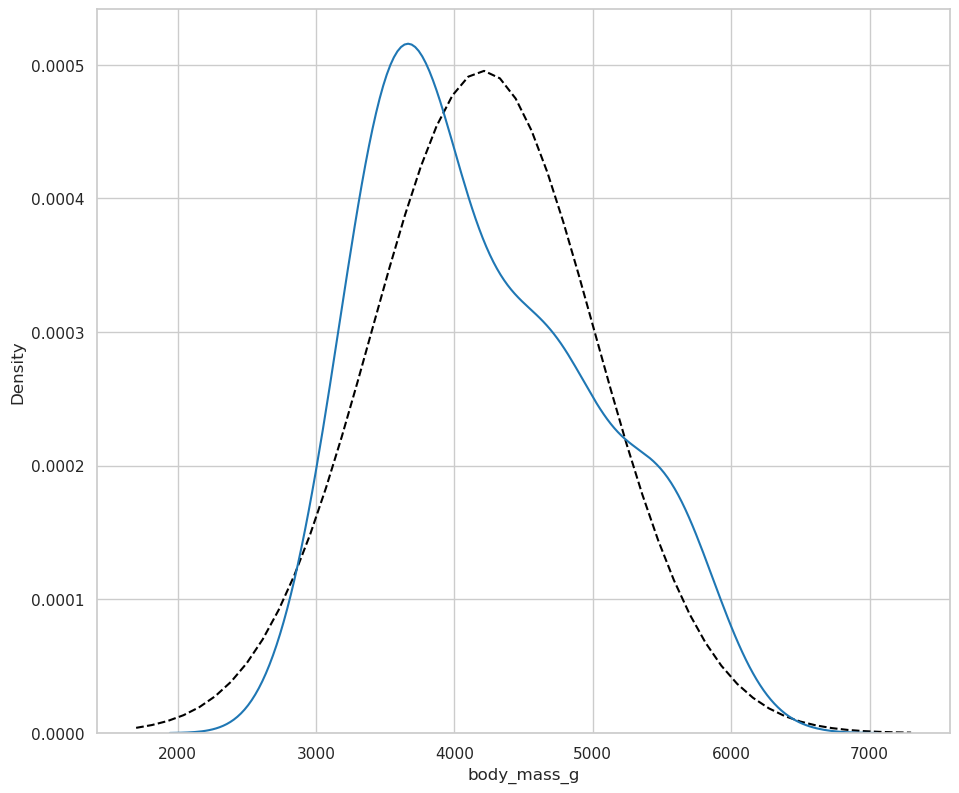

In [74]:
xs = np.linspace(stats['min']-1000, stats['max'] + 1000)
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

Ley de los Grandes Números y Teorema del Límite Central


Ley de los Grandes Números


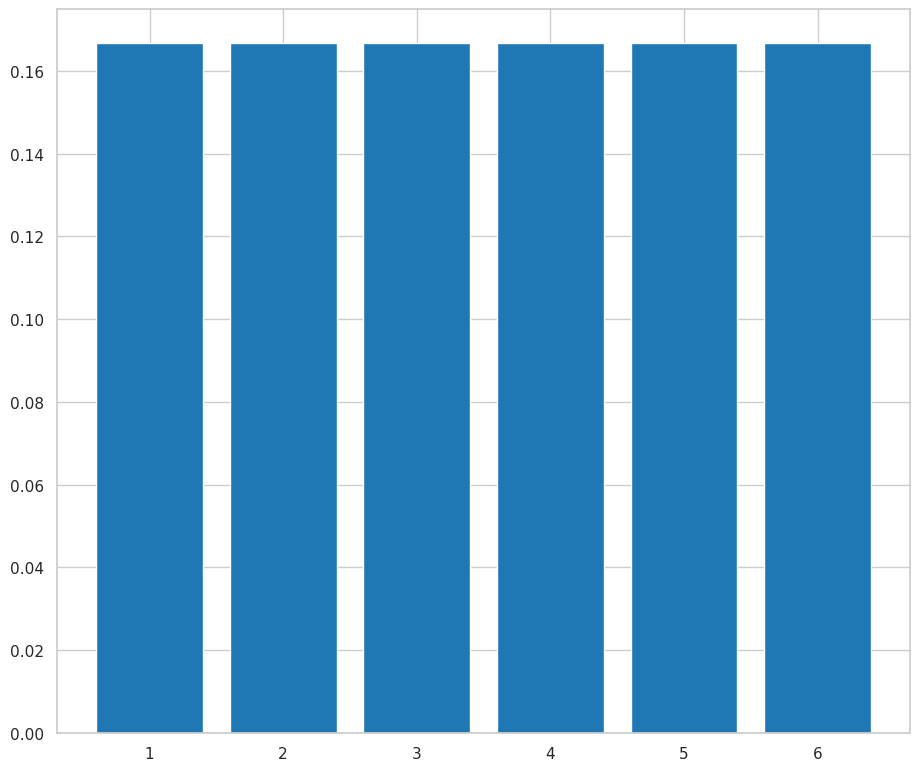

In [75]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

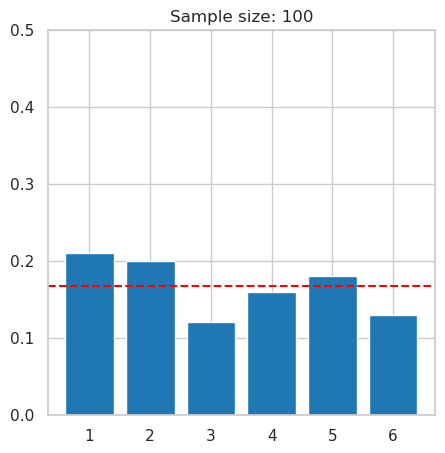

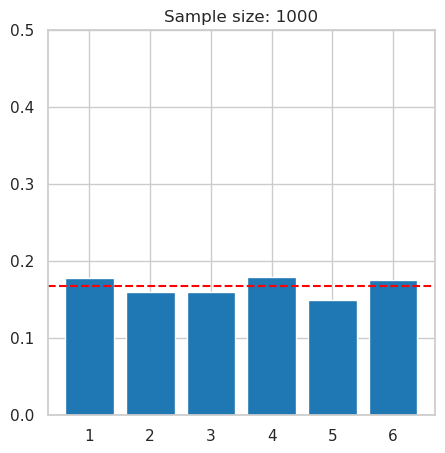

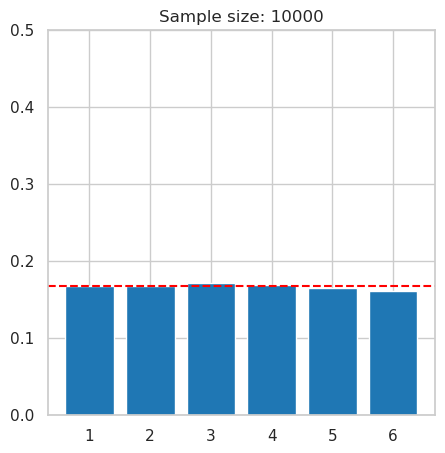

In [76]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")

Teorema del límite central


In [77]:
processed_penguins_df.sex.value_counts(normalize=True)


Male      0.504505
Female    0.495495
Name: sex, dtype: float64

In [78]:
sex_numeric = processed_penguins_df.sex.replace(['Male', 'Female'], [1, 0])


In [79]:
number_samples = 1000
sample_size=35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

/tmp/ipykernel_1147/1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_1147/1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_1147/1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

Estimated percentage of male penguins in population is: 50.4457%


/tmp/ipykernel_1147/1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_1147/1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_1147/1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

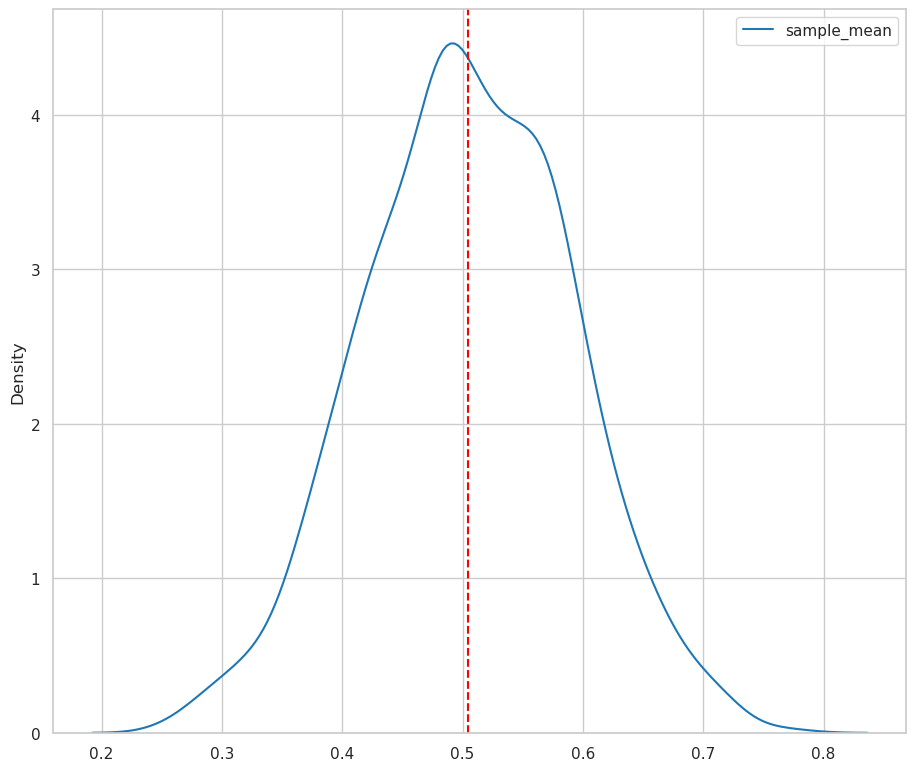

In [80]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [81]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

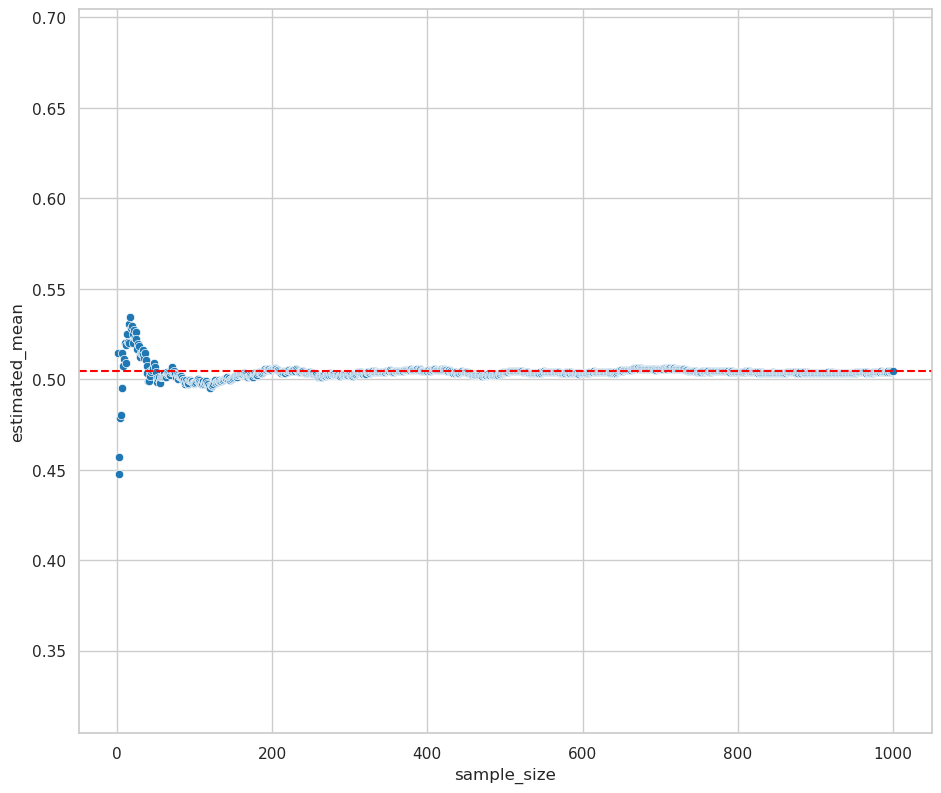

In [82]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])


Estableciendo relaciones: Gráfica de puntos


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

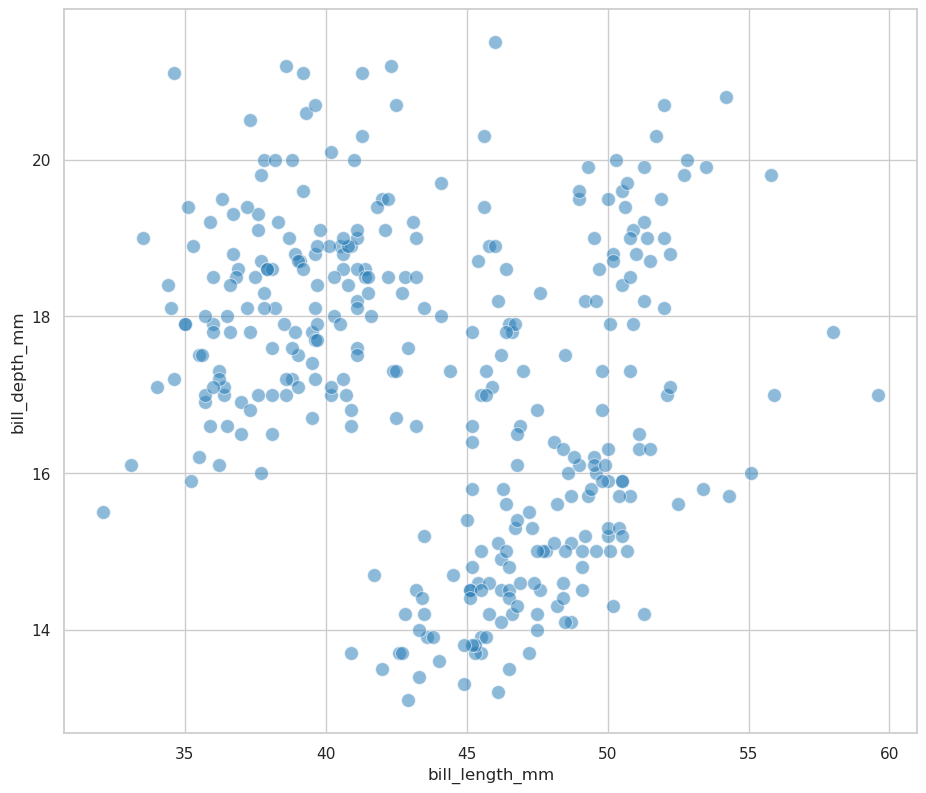

In [83]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

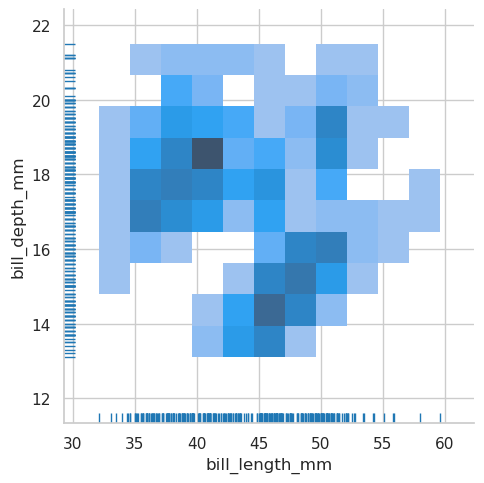

In [84]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

AttributeError: 'QuadContourSet' object has no attribute 'collections'

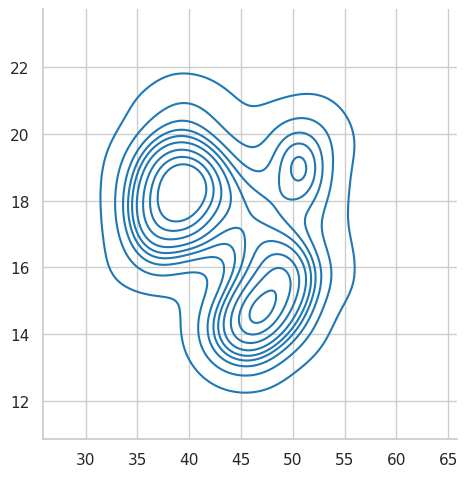

In [85]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    rug=True
)

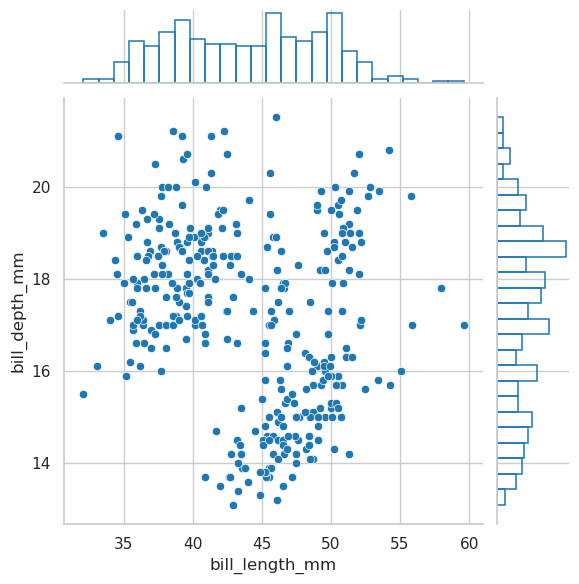

In [ ]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    marginal_kws=dict(bins=25, fill=False)
)

Estableciendo relaciones: Gráficos de violín y boxplots


<Axes: xlabel='species', ylabel='flipper_length_mm'>

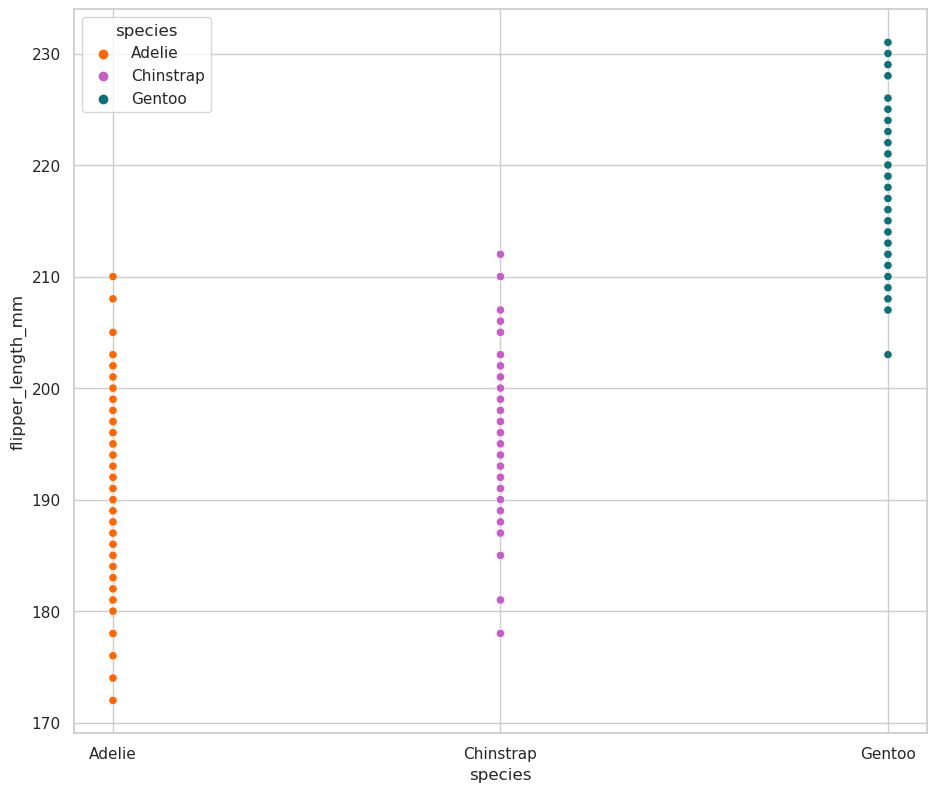

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

/tmp/ipykernel_864/826111948.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<Axes: xlabel='species', ylabel='flipper_length_mm'>

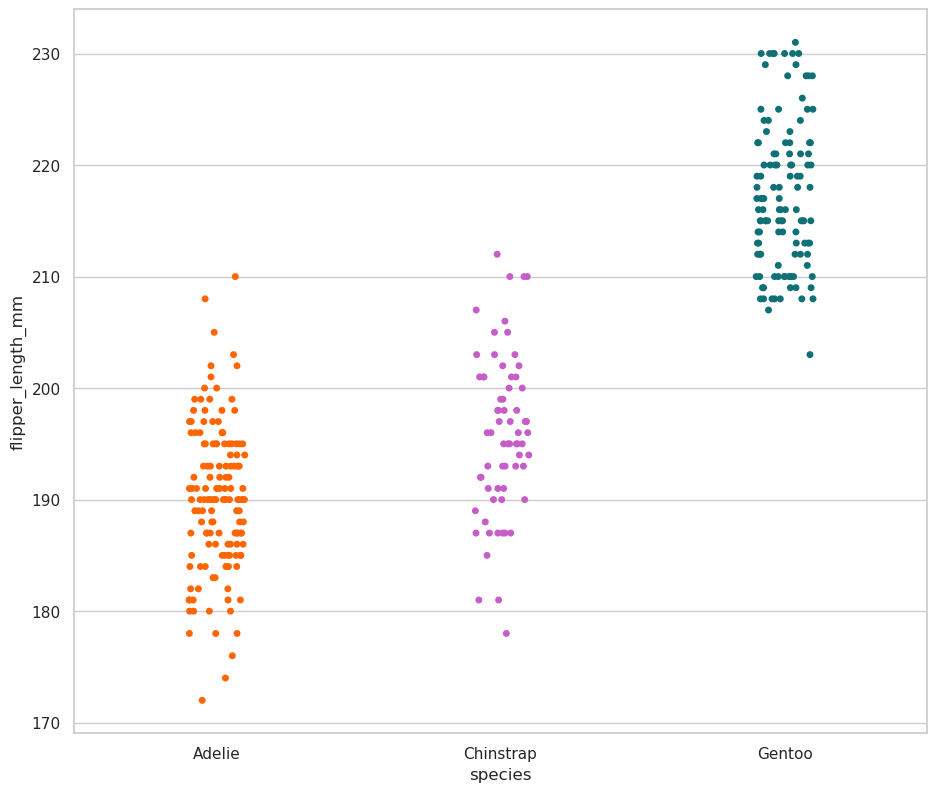

In [ ]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

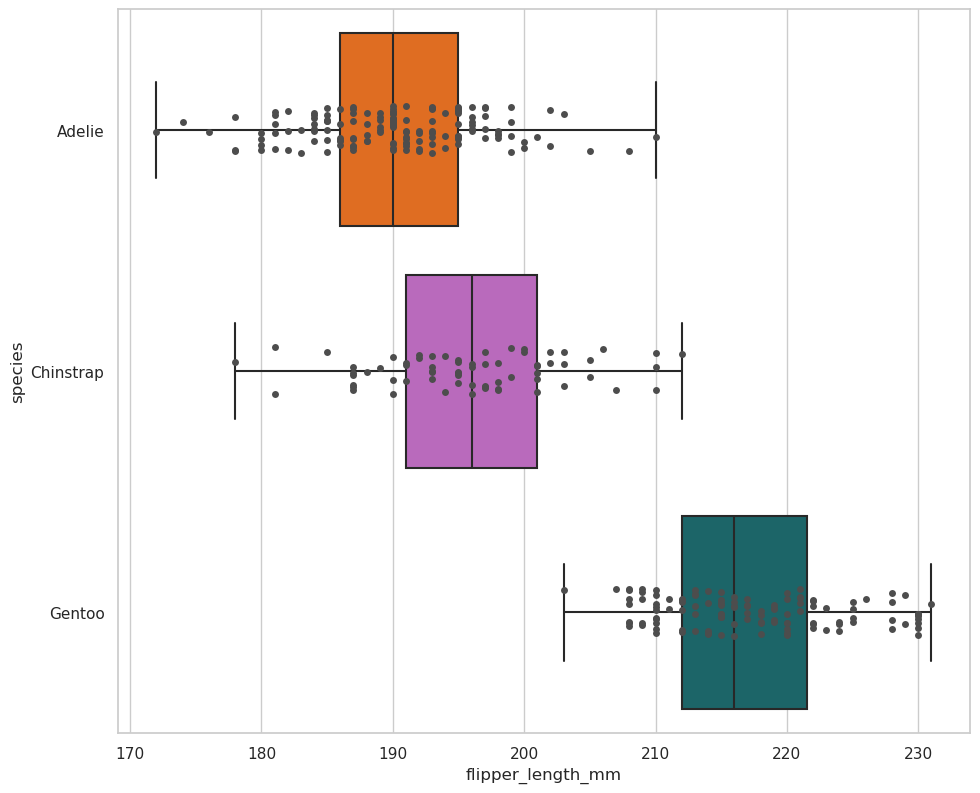

In [ ]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

/tmp/ipykernel_864/1926847696.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


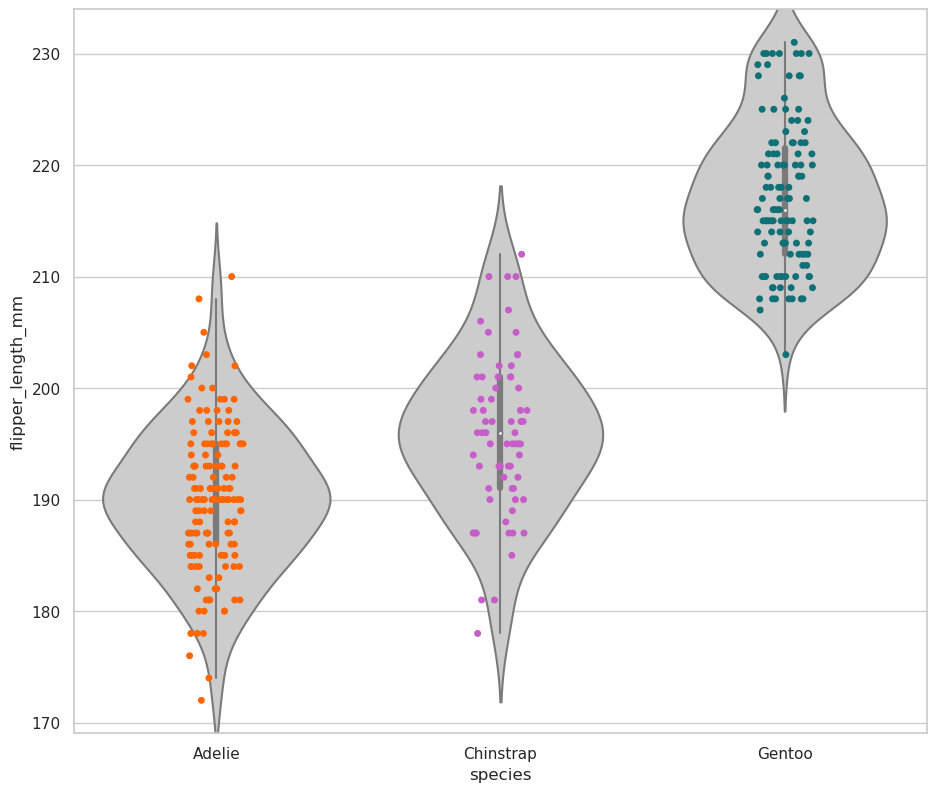

In [ ]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

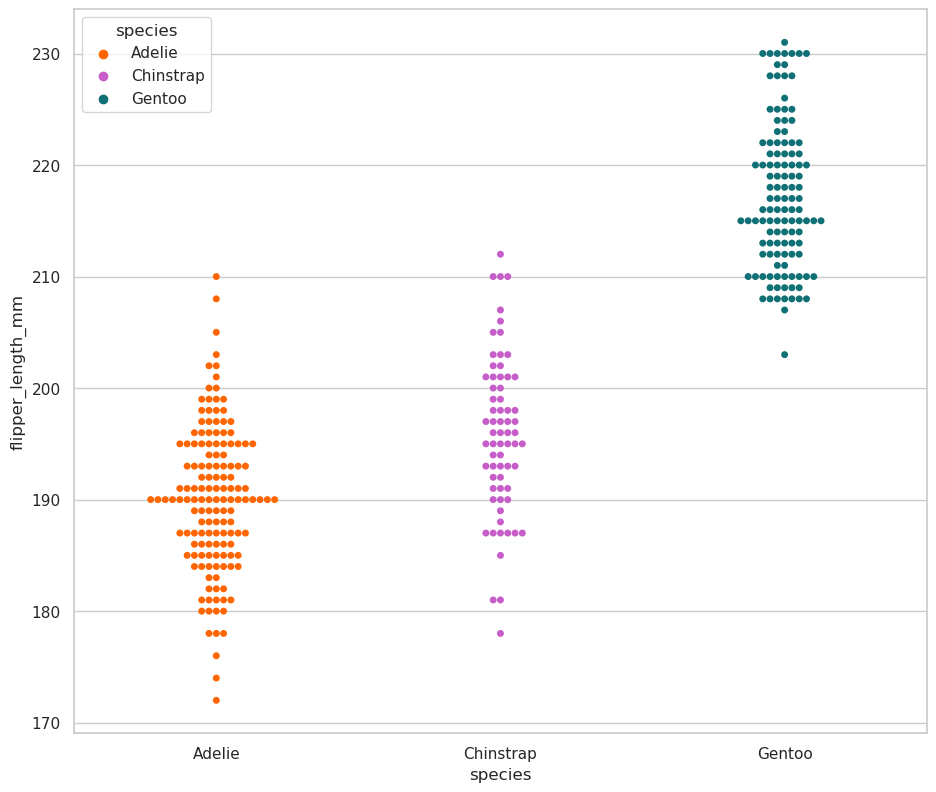

In [ ]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Estableciendo relaciones: Matrices de correlación

¿Existe una correlación lineal entre alguna de nuestras variables?

In [ ]:
processed_penguins_df.corr()


/tmp/ipykernel_864/3911974173.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


¿Como puedo visualizar los coeficientes de correlación?


/tmp/ipykernel_864/1293620812.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


<Axes: >

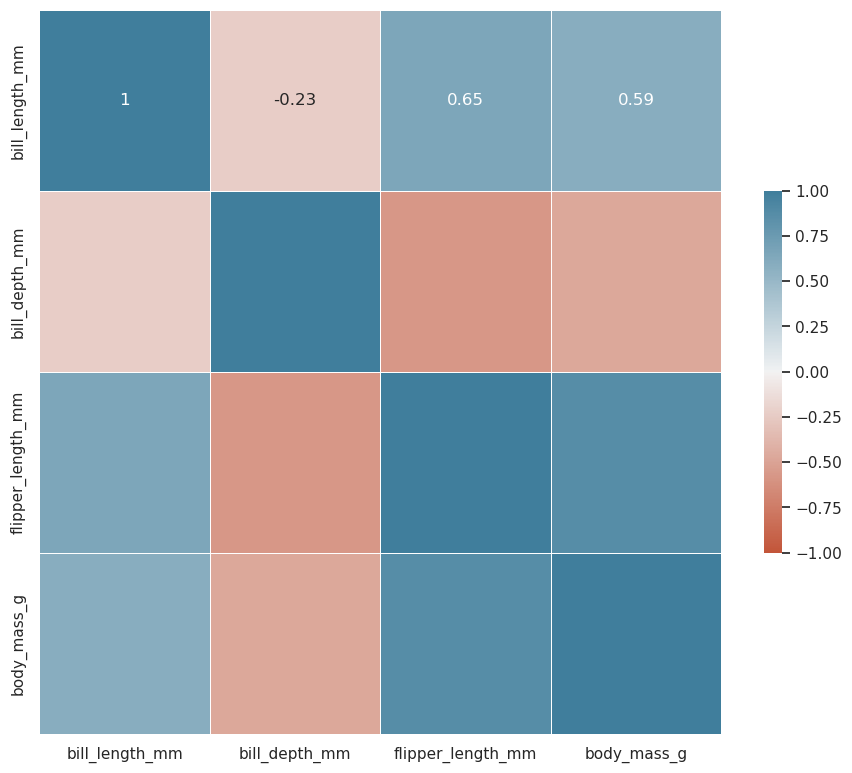

In [ ]:
sns.heatmap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

/tmp/ipykernel_864/873204341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


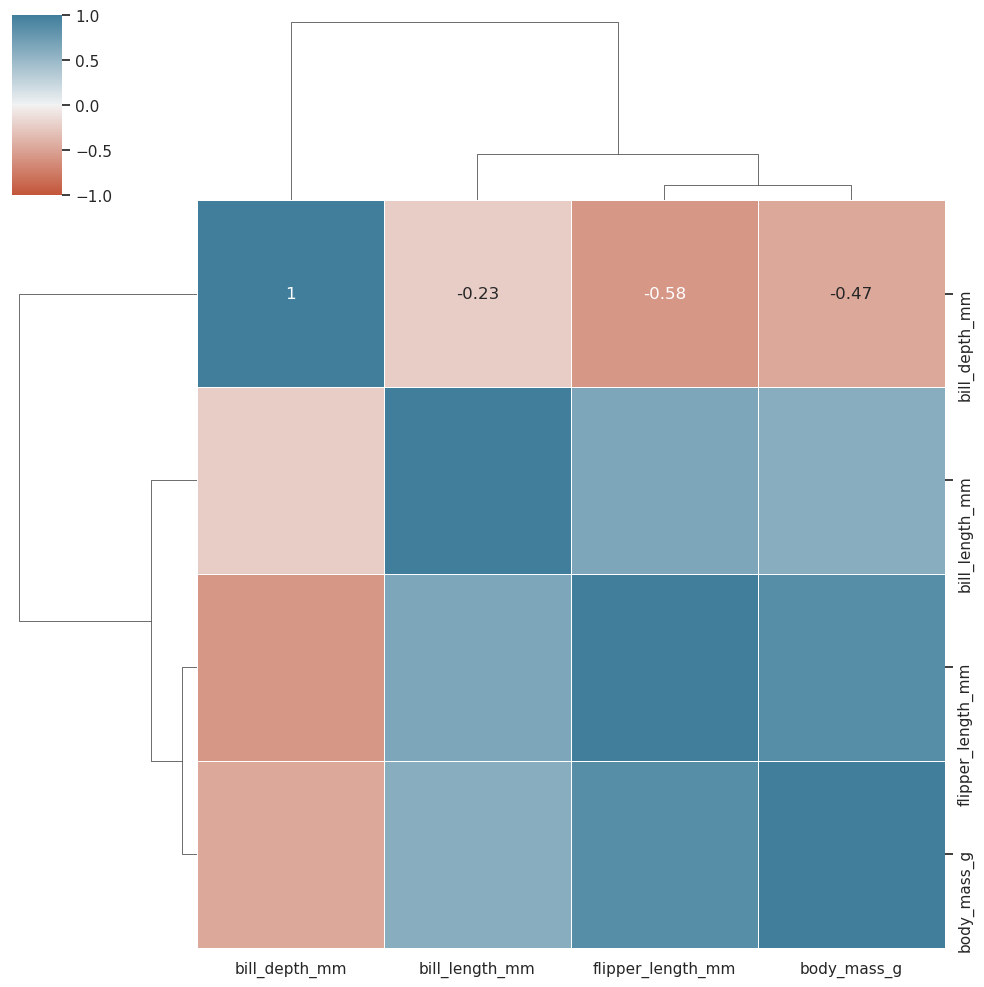

In [ ]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

¿Cómo podría representar una variable categórica como numérica discreta?


In [ ]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['Female', 'Male'], [0, 1])

    )
)


/tmp/ipykernel_864/873204341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


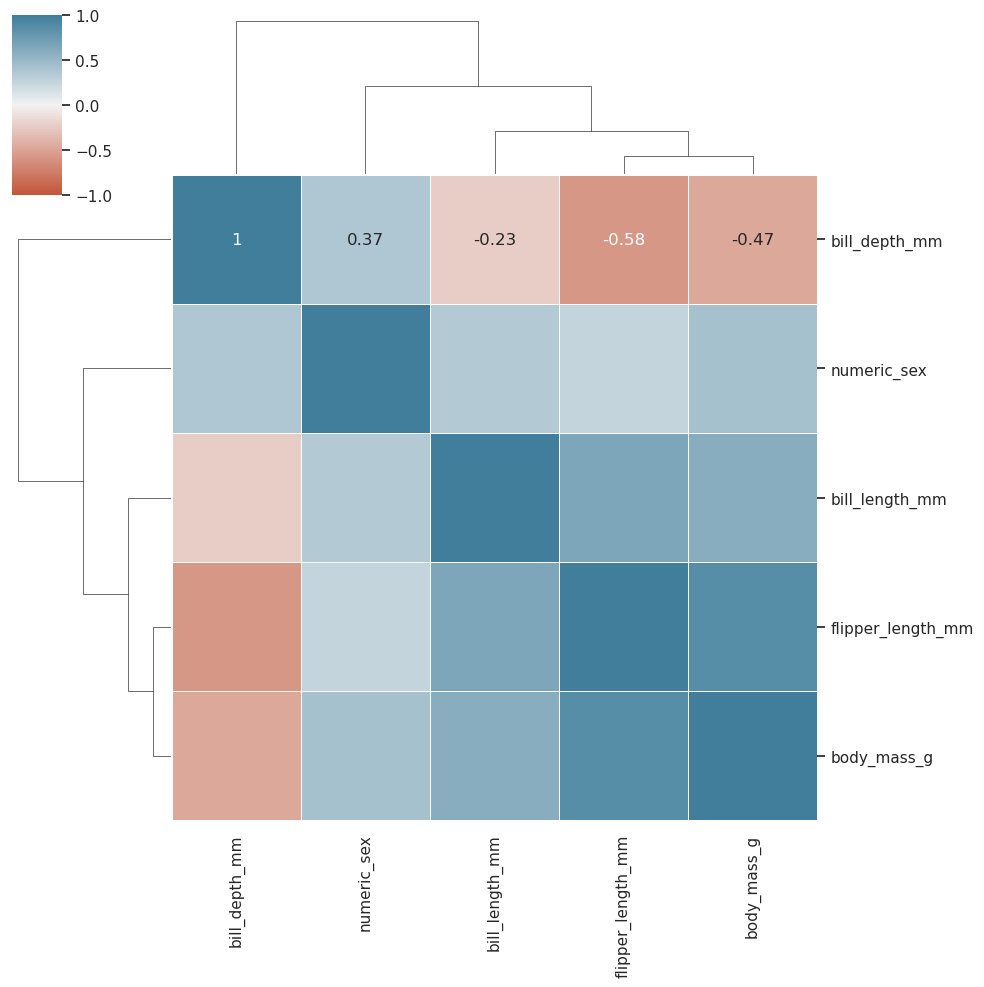

In [ ]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

¿Cuál es una límitante de los coeficientes de correlación lineal?


Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación


array([[1.        , 0.00269802],
       [0.00269802, 1.        ]])

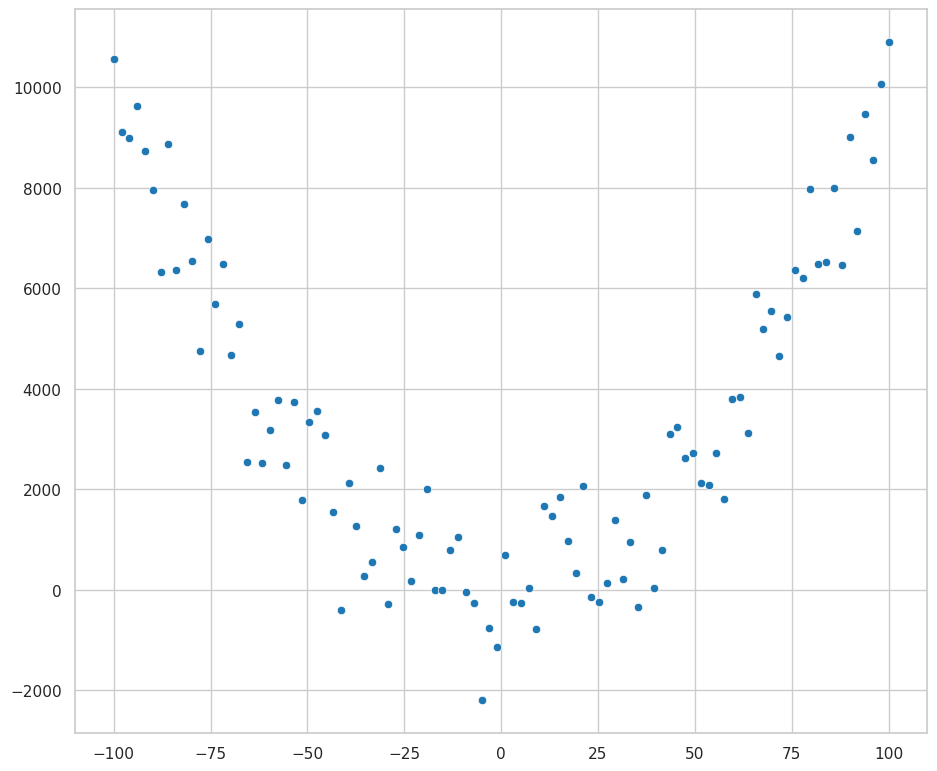

In [ ]:
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

array([[1.        , 0.91665357],
       [0.91665357, 1.        ]])

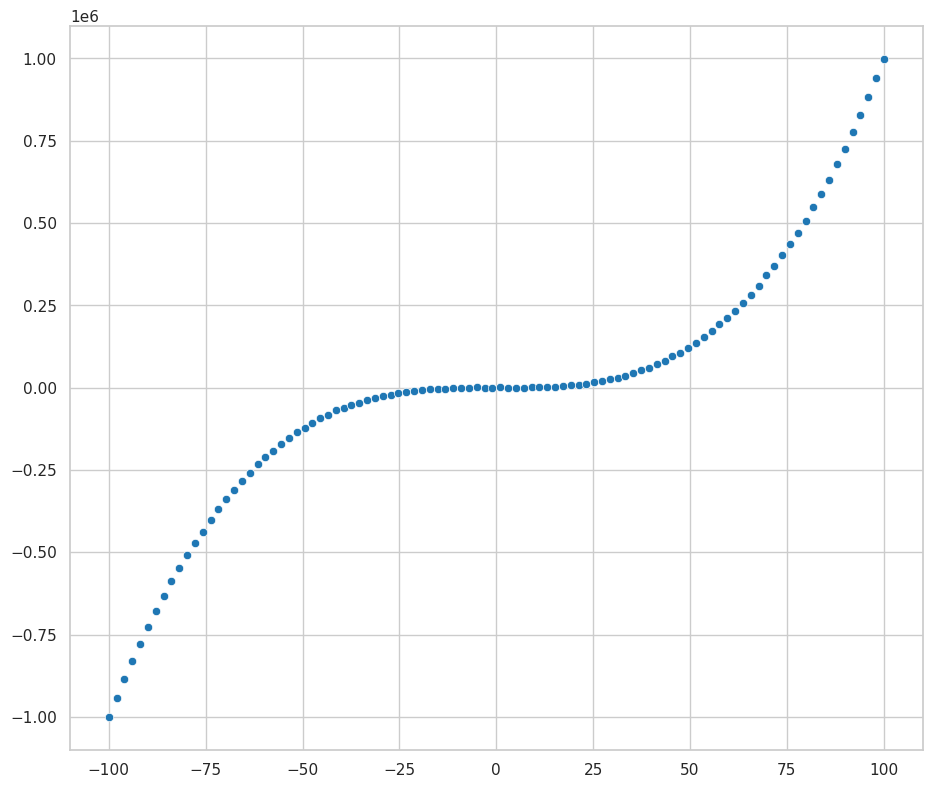

In [ ]:
x = np.linspace(-100, 100, 100)
y = x ** 3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

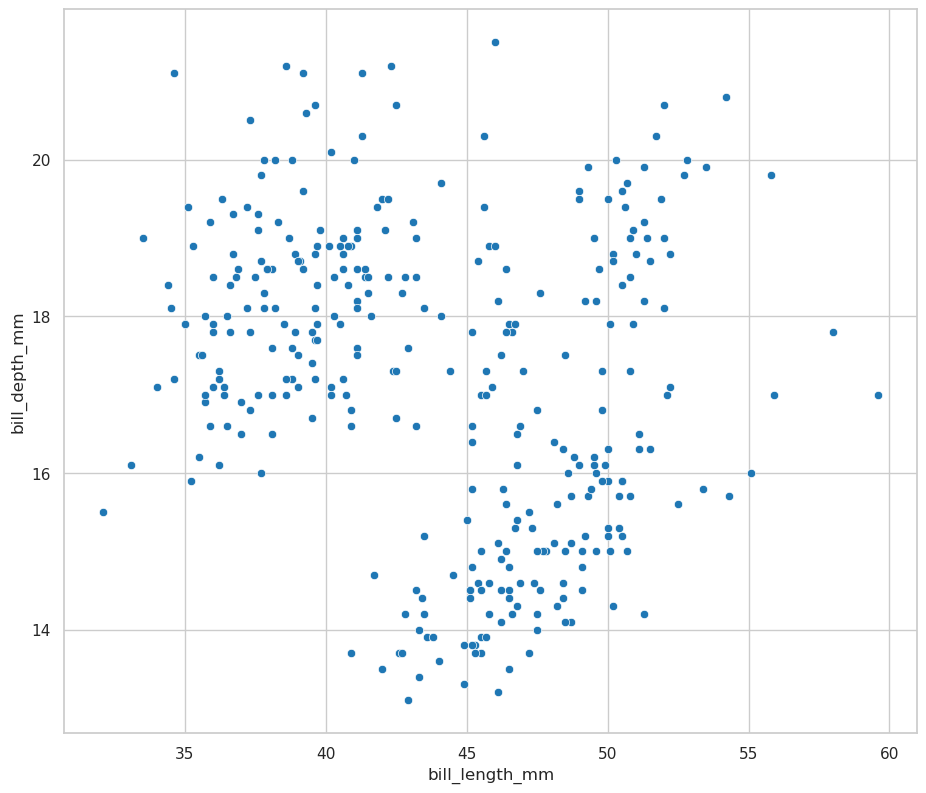

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

El coeficiente de correlación no nos habla del impacto de la relación


[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


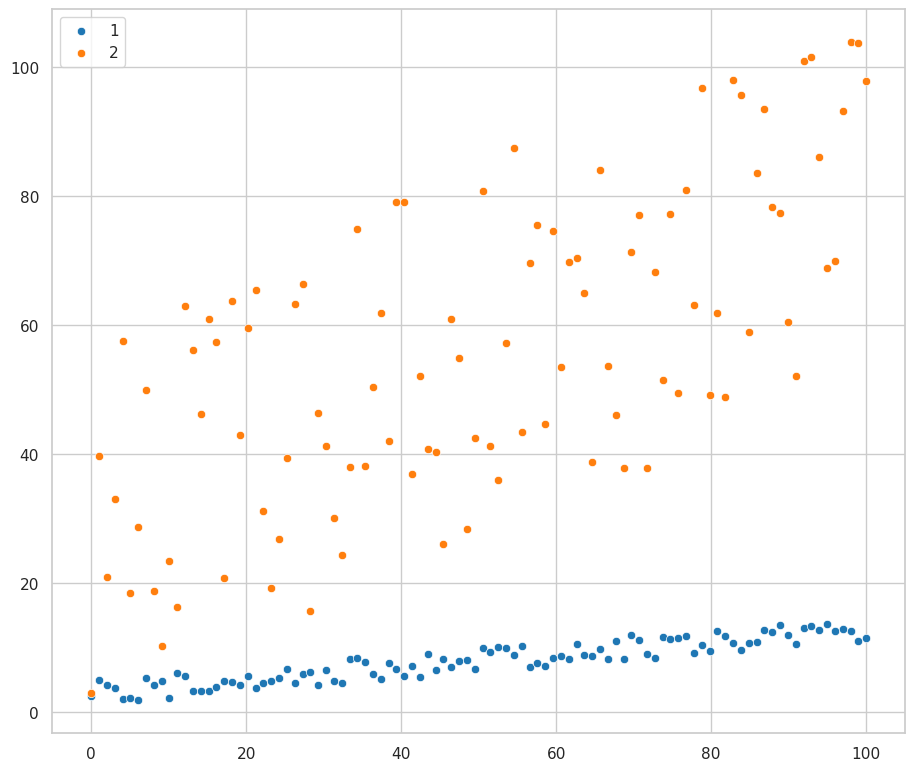

In [ ]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

Estableciendo relaciones: Análisis de regresión simple


In [ ]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep="\n")

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


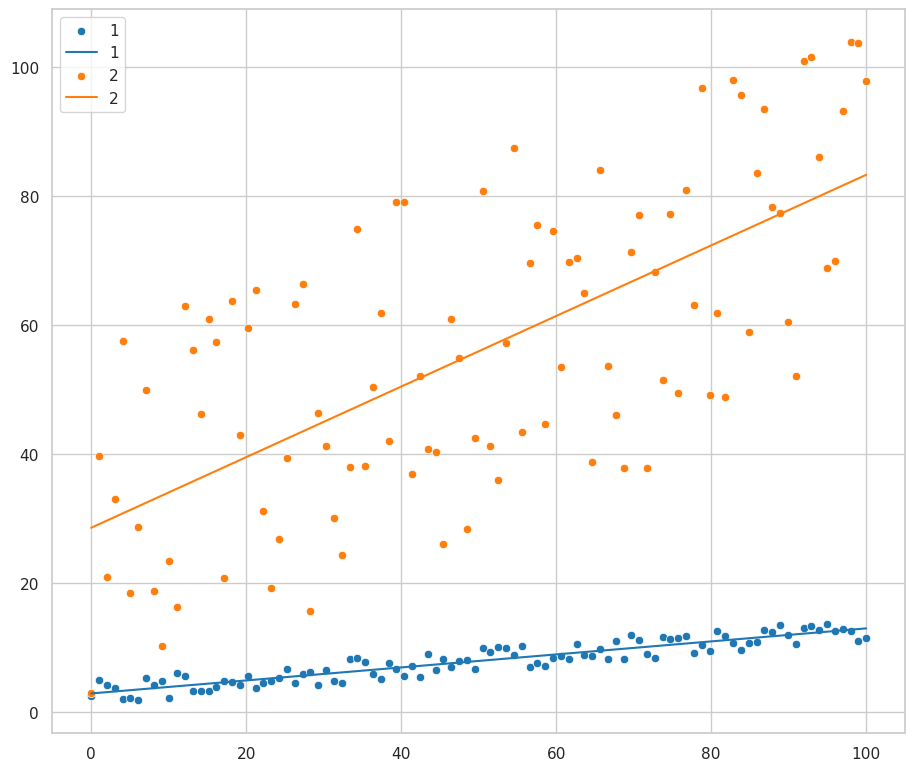

In [ ]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862287, intercept=20.78664866843383, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409803)


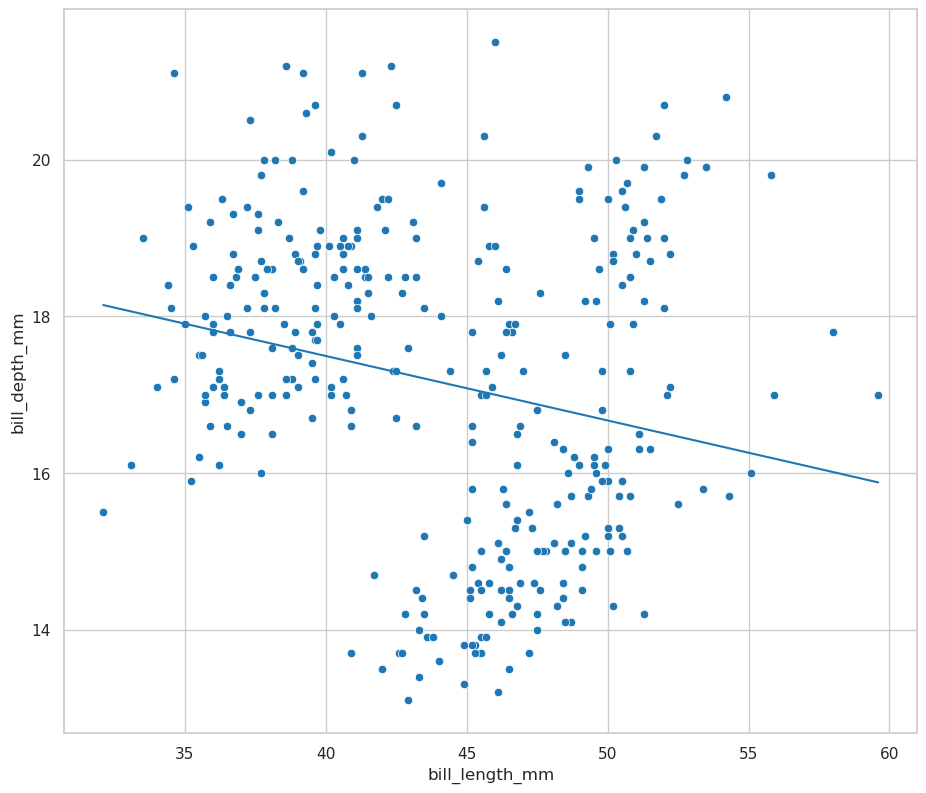

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1

plt.plot(fx_1, fy_1)

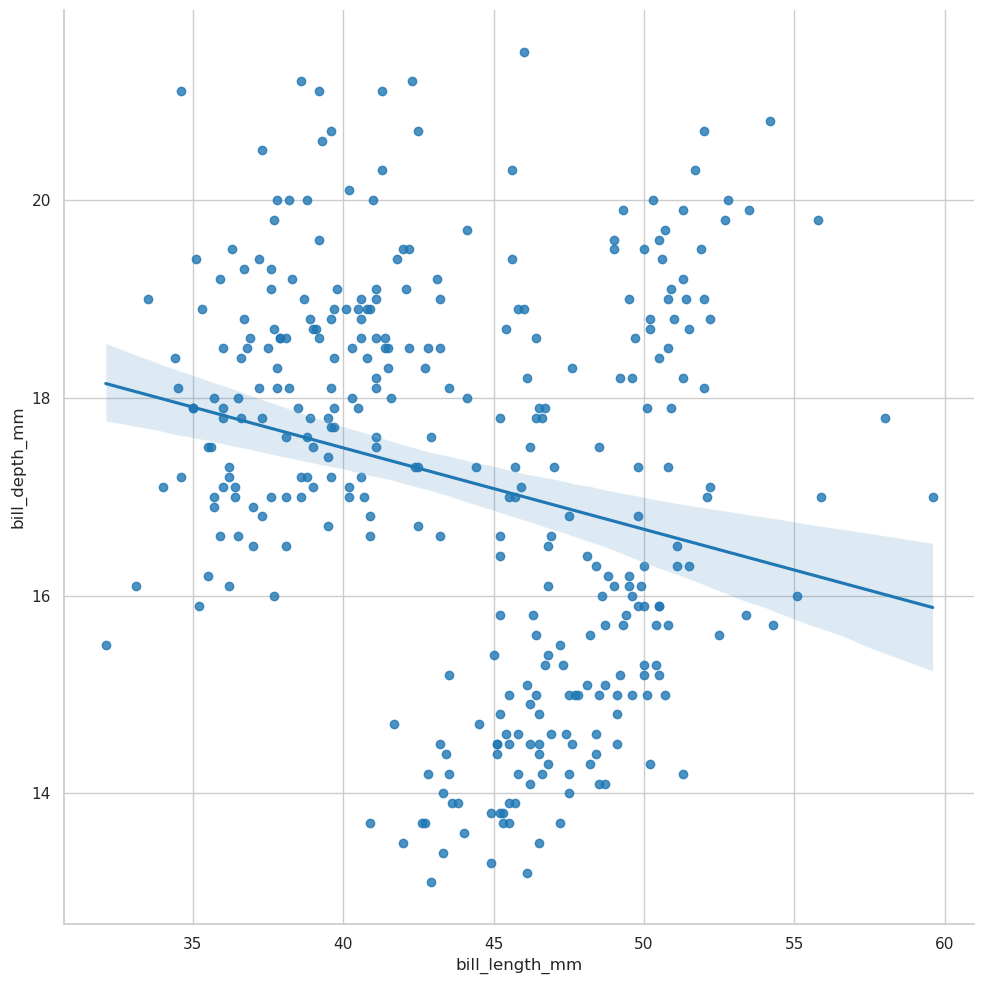

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

Limitaciones del análisis de regresión simple


La regresión lineal simple no es simétrica


In [ ]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(y=x, x=y)

print(res_x_y, res_y_x, sep="\n")

LinregressResult(slope=-0.08232675339862287, intercept=20.78664866843383, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409803)
LinregressResult(slope=-0.6349051704195027, intercept=54.89085424504755, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.14859778216623307, intercept_stderr=2.567341513538255)


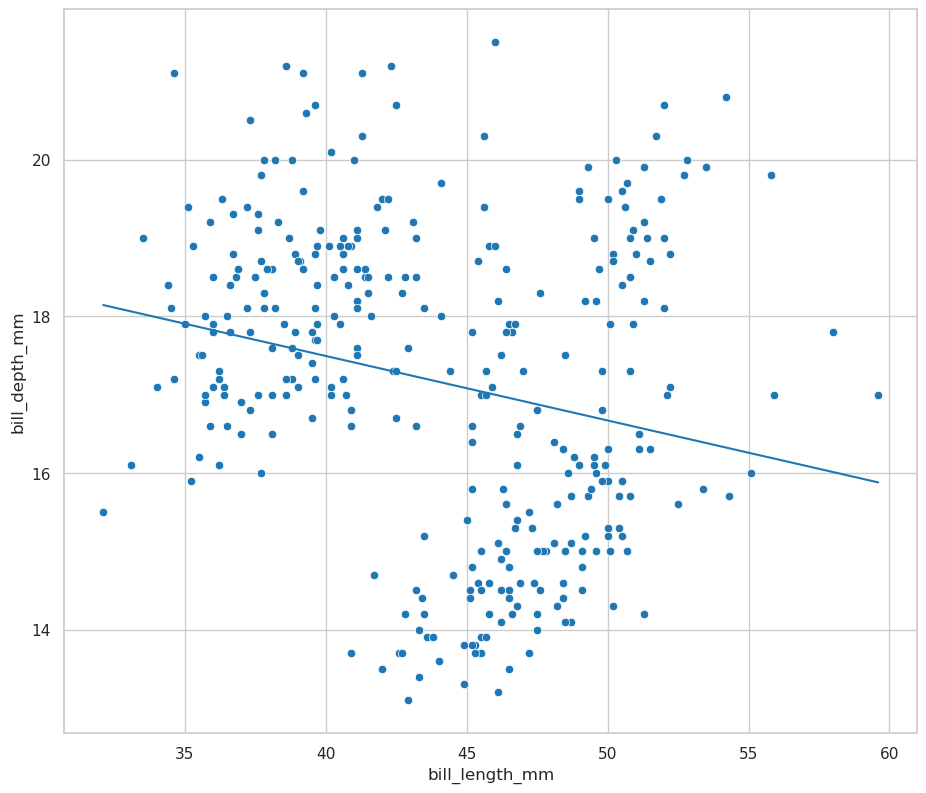

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

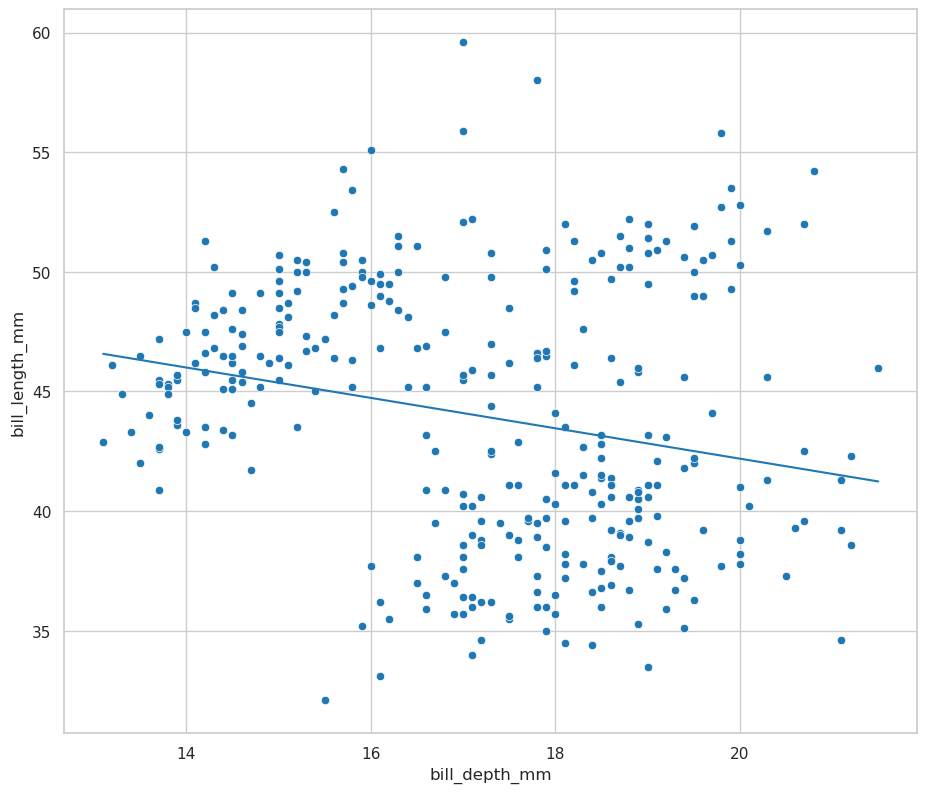

In [ ]:
sns.scatterplot(
    x=y,
    y=x
)

fx_1 = np.array([y.min(), y.max()])
fy_1 =  res_y_x.intercept + res_y_x.slope *  fx_1

plt.plot(fx_1, fy_1)

La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables

La pendiente es -0.634905, lo que significa que cada milímetro adicional de profundidad del pico es asociado a un decremento de -0.634905 milímetros de la longitud del pico de un pingüino.



In [ ]:
(
    smf.ols(
        formula="bill_length_mm ~ bill_depth_mm",
         data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [ ]:
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.53e-05
Time:                        14:37:57   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análisis de regresión múltiple


Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?


Creando modelos

In [ ]:
model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.54e-32
Time:                        14:38:44   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm ",
         data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           7.04e-46
Time:                        14:38:56   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

NameError: name 'processed_penguins_df' is not defined

In [ ]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_4.summary()


NameError: name 'processed_penguins_df' is not defined

In [ ]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

NameError: name 'processed_penguins_df' is not defined

Visualizando resultados


creación de resultados


In [86]:
models_results = pd.DataFrame(
    dict(
        actual_value=preprocessed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=preprocessed_penguins_df.species,
        sex=preprocessed_penguins_df.sex
    )
)

models_results

NameError: name 'model_1' is not defined

In [ ]:
sns.ecdfplot(
    data=models_results#.select_columns(['actual_value', 'prediction_model_5'])
)

NameError: name 'models_results' is not defined

<Axes: ylabel='Density'>

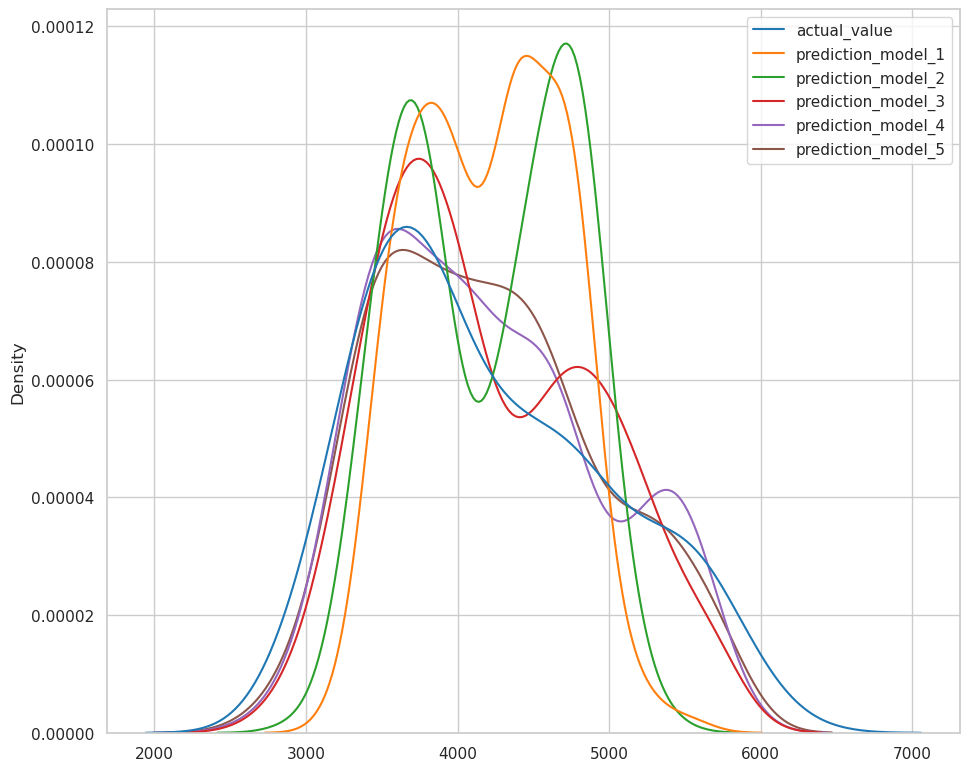

In [ ]:
sns.kdeplot(
    data=models_results,
    cumulative=False
)

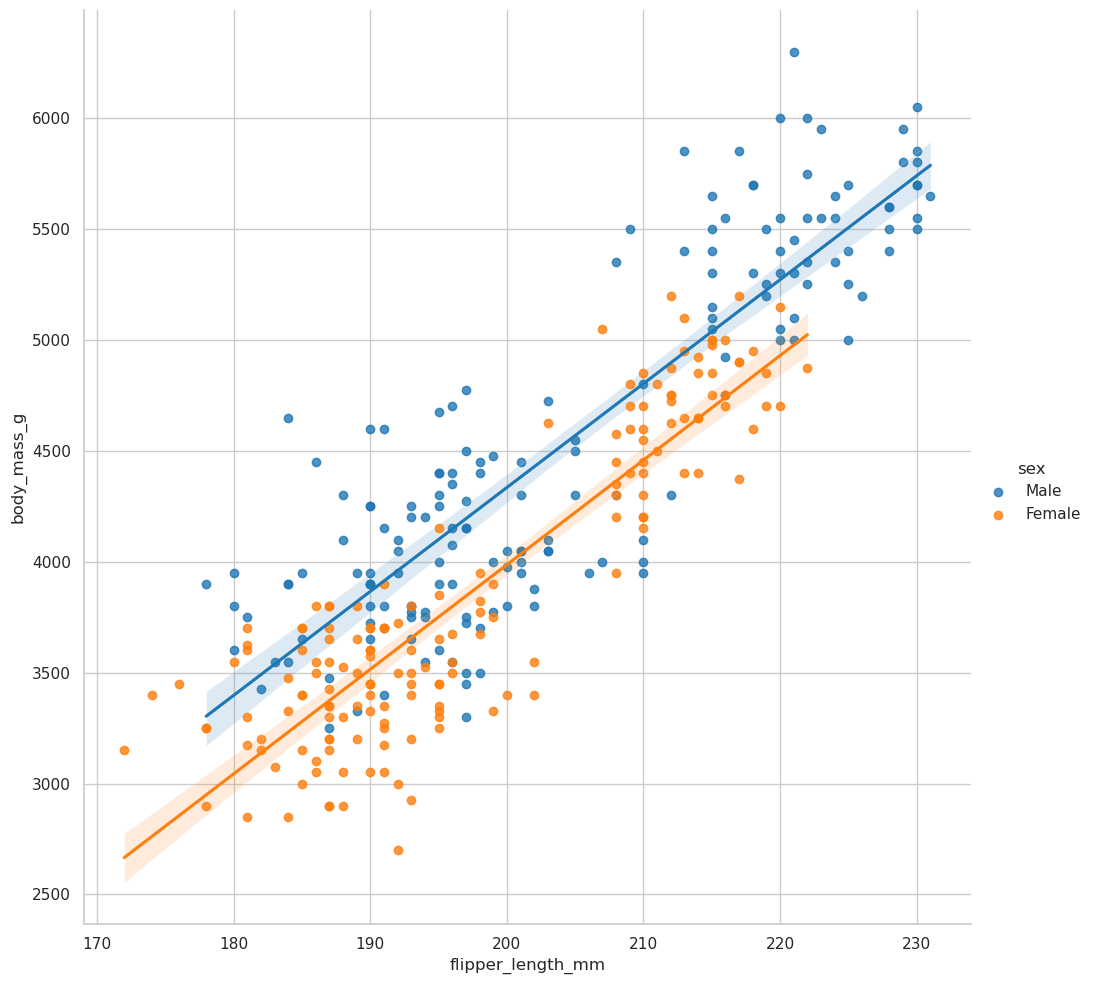

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10,
    hue='sex'
)

Análisis de regresión logística


pedemos predecir si un pinguino es macho o hembra?

In [88]:
smf.logit(
    formula='sex_numeric ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            sex_numeric   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.4793
Time:                        17:10:06   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [89]:
(
    processed_penguins_df
    .value_counts(['island', 'sex', 'species'])
    .reset_index(name='count')
)

,island,sex,species,count
0,Biscoe,Male,Gentoo,61
1,Biscoe,Female,Gentoo,58
2,Dream,Female,Chinstrap,34
3,Dream,Male,Chinstrap,34
4,Dream,Male,Adelie,28
5,Dream,Female,Adelie,27
6,Torgersen,Female,Adelie,24
7,Torgersen,Male,Adelie,23
8,Biscoe,Female,Adelie,22
9,Biscoe,Male,Adelie,22


In [90]:
processed_penguins_df.species.unique()


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [91]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]))
)

In [92]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit(maxiter=100)

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.Male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [93]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]),
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
338,0,0.0
340,0,0.0
341,0,0.0
342,0,0.0


In [94]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
    .pivot_wider(
        index='actual_adelie',
        names_from='predicted_values',
        values_from='count'
    )
    .rename_column('actual_adelie', 'actual / predicted')
)


/home/grlg/miniconda3/envs/DE/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)
/home/grlg/miniconda3/envs/DE/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,actual / predicted,0.0,1.0
0,0,151,36
1,1,17,129


In [95]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

Paradoja de Simpson


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

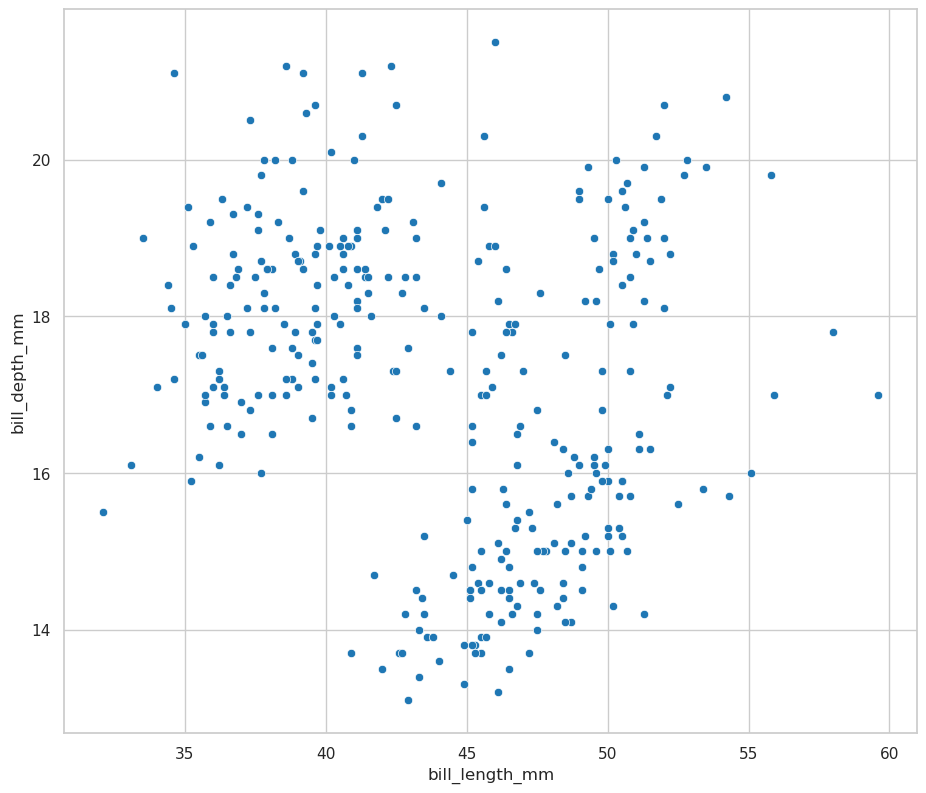

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

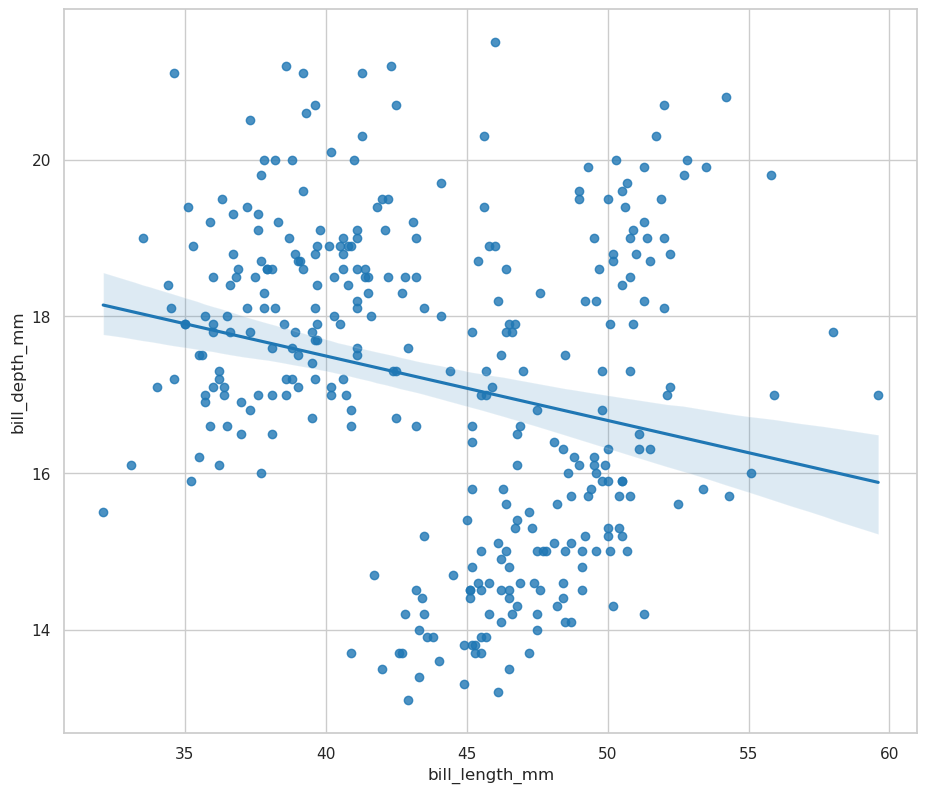

In [ ]:
sns.regplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

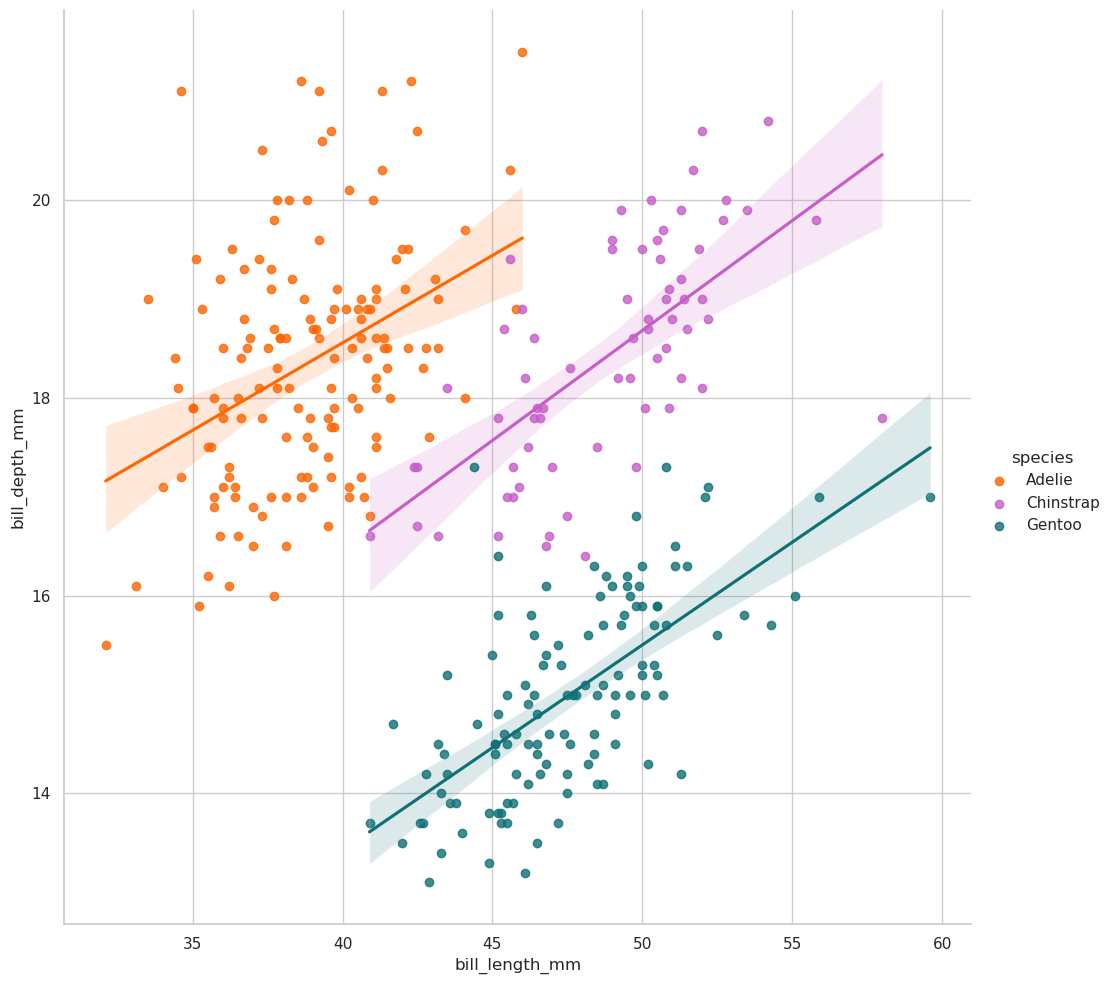

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

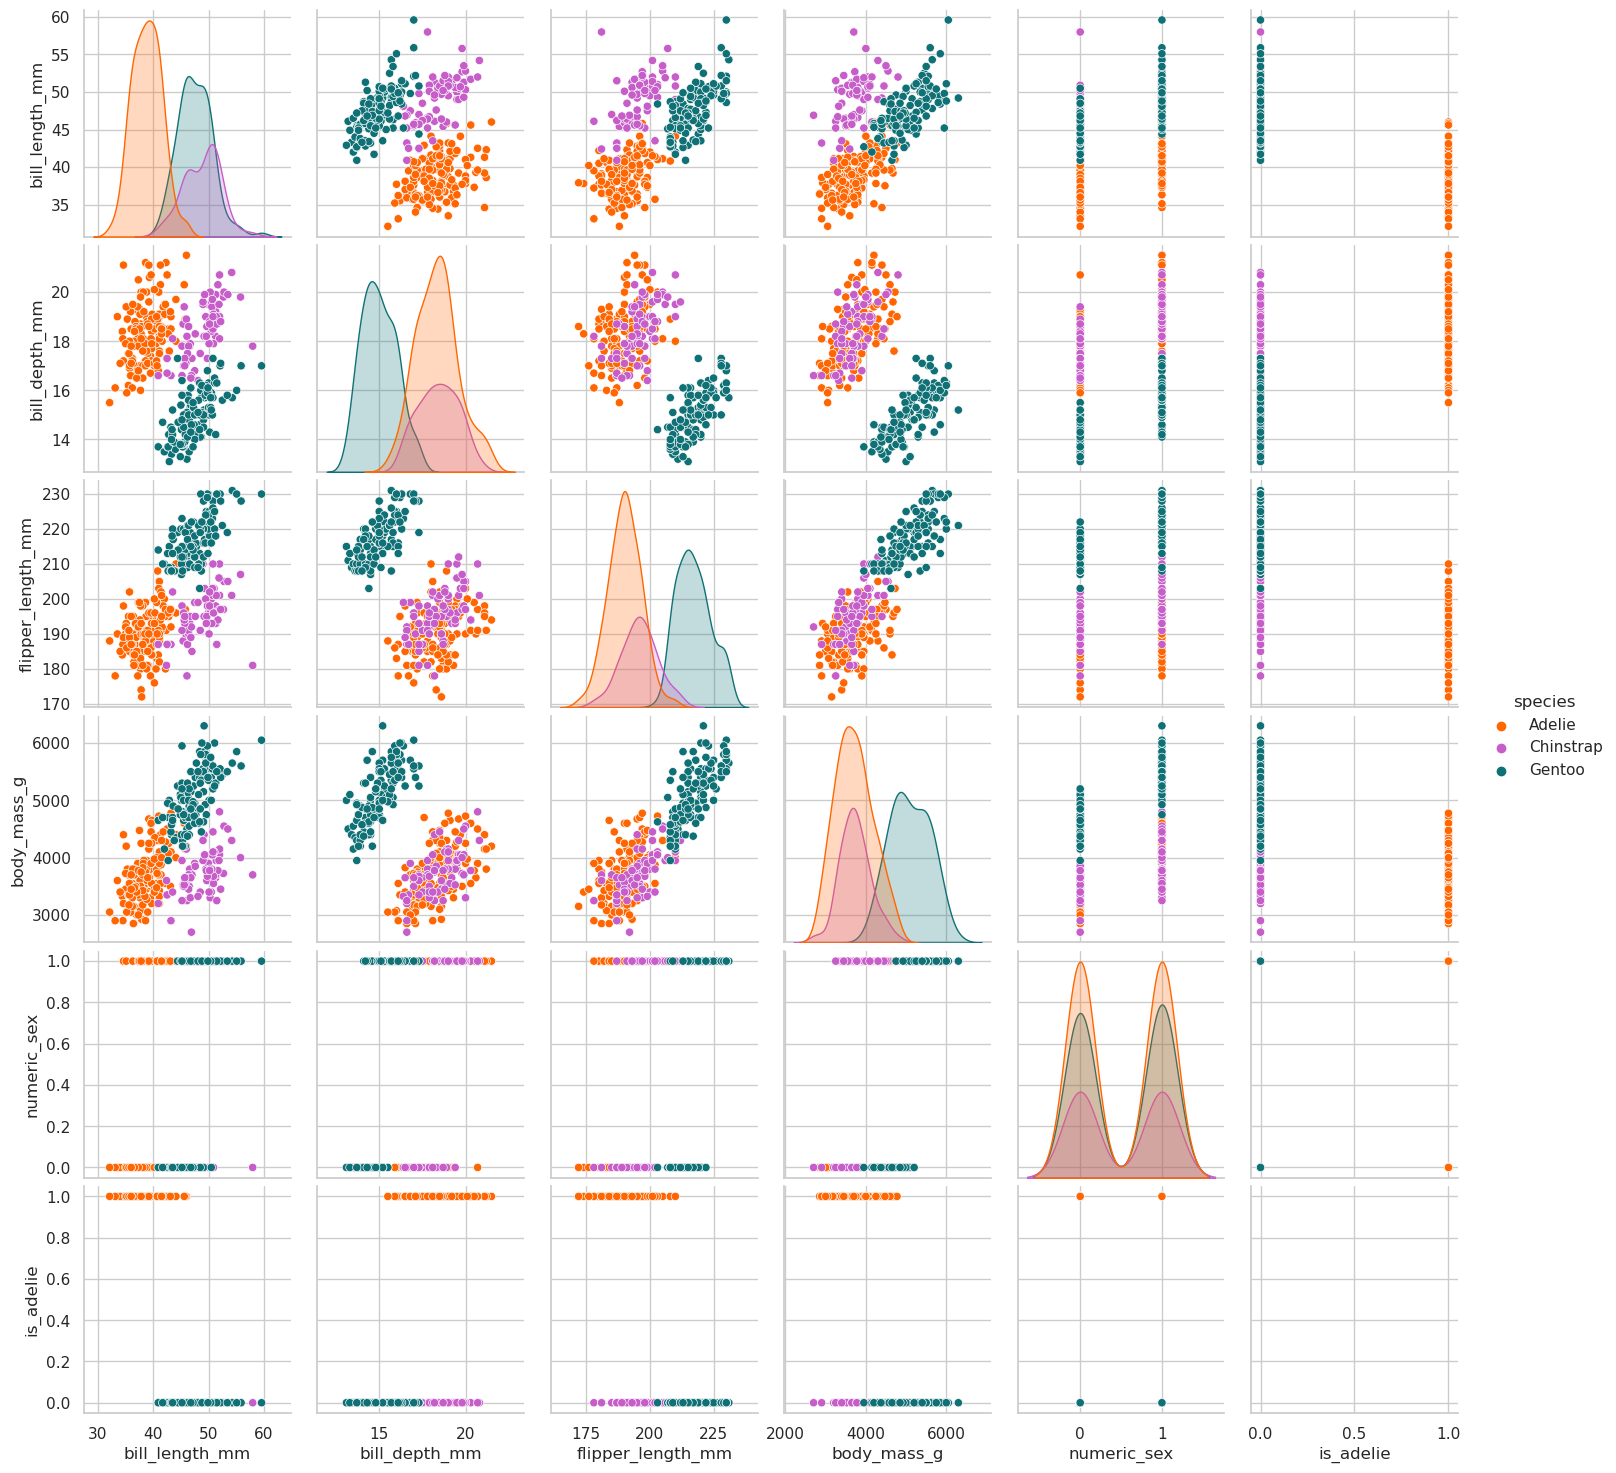

In [ ]:
sns.pairplot(data=processed_penguins_df, hue='species', palette=penguin_color)


Información de sesión


In [ ]:
session_info.show()




[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


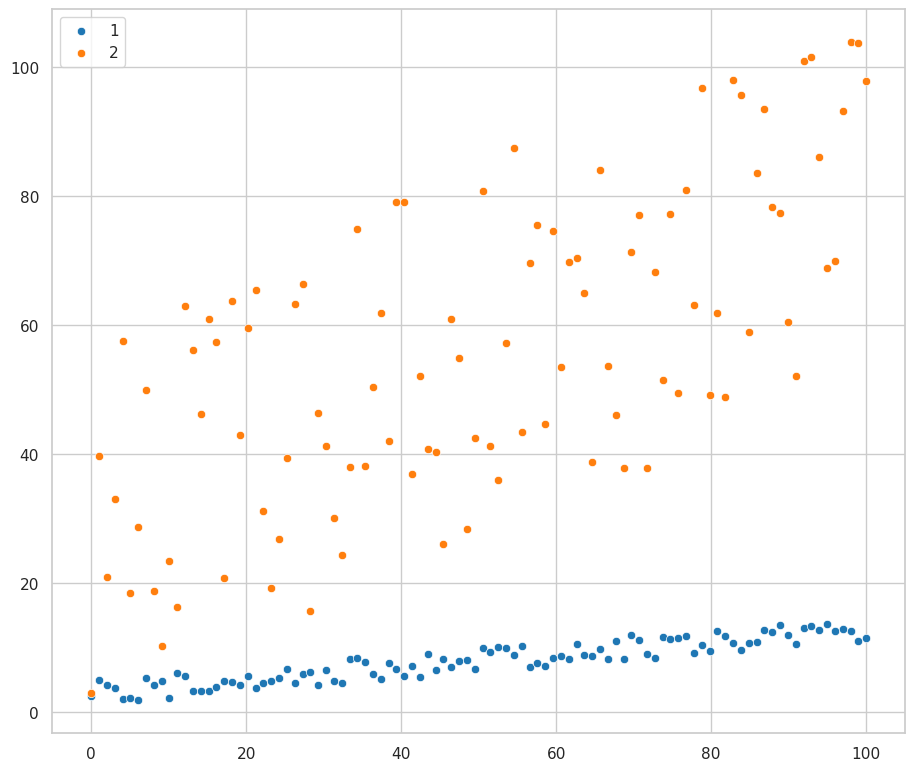

In [ ]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))